<a href="https://colab.research.google.com/github/bijumanvya/BITS-Apex-Project/blob/main/FE_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA EXTRACTION FROM KAGGLE


In [ ]:
!pip install kaggle --quiet

In [ ]:
import os
import pandas as pd

# Ensure you have your Kaggle API credentials set up.
# You can upload your kaggle.json file to the Colab environment
# or set KAGGLE_USERNAME and KAGGLE_KEY as environment variables.


os.environ['KAGGLE_USERNAME'] = 'bijumanvya'
os.environ['KAGGLE_KEY'] = '2076ee2305bf13fb0453a9e507cbba25'


!kaggle competitions download -c house-prices-advanced-regression-techniques -q --force


!unzip -q house-prices-advanced-regression-techniques.zip -d ./house_prices_data


df = pd.read_csv('./house_prices_data/train.csv')


print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

#Check Data set details

In [ ]:
df.info()
print(f"Total number of rows: {df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Create new column related student ID

In [ ]:
import numpy as np

def generate_student_feature(df, ID_last7):

  np.random.seed(ID_last7 % 1000)

  return np.random.randint(low=1, high=100, size=len(df)) + (ID_last7 % 7)

In [ ]:
df['student_random_feature'] = generate_student_feature(df, ID_last7=1100175)
display(df.head())

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  student_random_feature  
0       WD         Normal     208500                      27  
1       WD         Normal     181500                      91  
2       WD         Normal     223500                      74  
3       WD        Abnorml     140000                       8  
4       WD         Normal     250000                      26  

[5 rows x 82 columns]

In [ ]:
df.info()
print(f"Total number of rows: {df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   MSSubClass              1460 non-null   int64  
 2   MSZoning                1460 non-null   object 
 3   LotFrontage             1201 non-null   float64
 4   LotArea                 1460 non-null   int64  
 5   Street                  1460 non-null   object 
 6   Alley                   91 non-null     object 
 7   LotShape                1460 non-null   object 
 8   LandContour             1460 non-null   object 
 9   Utilities               1460 non-null   object 
 10  LotConfig               1460 non-null   object 
 11  LandSlope               1460 non-null   object 
 12  Neighborhood            1460 non-null   object 
 13  Condition1              1460 non-null   object 
 14  Condition2              1460 non-null   

#Get Information about the data

#Get missing value features and get percentage of missing values

In [ ]:
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

display(missing_info[missing_info['Missing Count'] > 0])

Missing Count  Missing Percentage
LotFrontage             259           17.739726
Alley                  1369           93.767123
MasVnrType              872           59.726027
MasVnrArea                8            0.547945
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247
BsmtFinType2             38            2.602740
Electrical                1            0.068493
FireplaceQu             690           47.260274
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945
PoolQC                 1453           99.520548
Fence                  1179           80.753425
MiscFeature            1406           96.301370

#Plot heatmap to identify the depth of missing values

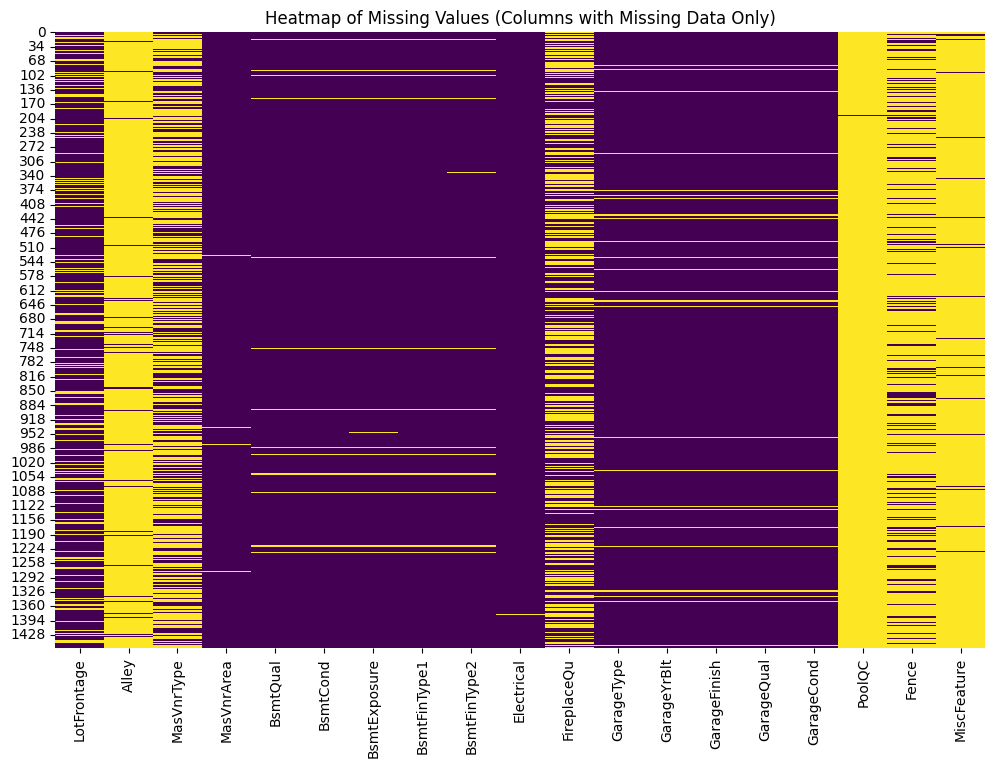

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()

# Create a heatmap of only the columns with missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df[missing_cols].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (Columns with Missing Data Only)')
plt.show()

#Drop the columns which has missing values more than 50%

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Get the list of columns to drop (where missing percentage is > 50%)
columns_to_drop = missing_percentages[missing_percentages > 50].index.tolist()

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

print(f"Dropped columns with more than 50% missing values: {columns_to_drop}")

# Display the first few rows of the updated DataFrame to confirm the columns are dropped
display(df.head())

Dropped columns with more than 50% missing values: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... ScreenPorch PoolArea MiscVal MoSold YrSold  \
0    AllPub    Inside  ...           0        0       0      2   2008   
1    AllPub       FR2  ...           0        0       0      5   2007   
2    AllPub    Inside  ...           0        0       0      9   2008   
3    AllPub    Corner  ...           0        0       0      2   2006   
4    AllPub       FR2  ...           0        0       0     12   2008   

  SaleType  SaleCondition  SalePrice  student_random_feature  missing_flag  
0       WD         Normal     208500                      27             1  
1       WD         Normal     181500                      91             1  
2       WD         Normal     223500                      74             1  
3       WD        Abnorml     140000                       8             1  
4       WD         Normal     250000                      26             1  

[5 rows x 78 columns]

#PLOT after dropping columns with more than 50% missing values

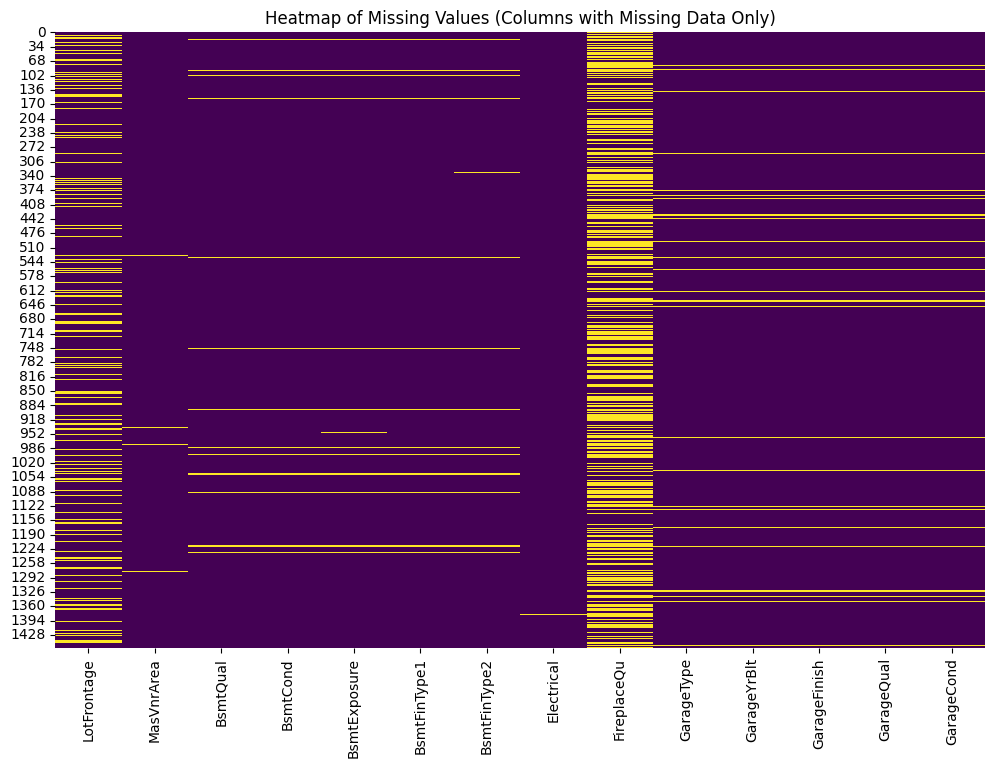

In [ ]:
# Get the list of columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()

# Create a heatmap of only the columns with missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df[missing_cols].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (Columns with Missing Data Only)')
plt.show()

In [ ]:
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

display(missing_info[missing_info['Missing Count'] > 0])

Missing Count  Missing Percentage
LotFrontage             259           17.739726
MasVnrArea                8            0.547945
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247
BsmtFinType2             38            2.602740
Electrical                1            0.068493
FireplaceQu             690           47.260274
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945

#Plotting correlation of missing columns FireplaceQu with sales price to decide retaining or to drop since it almost has 50% missing value

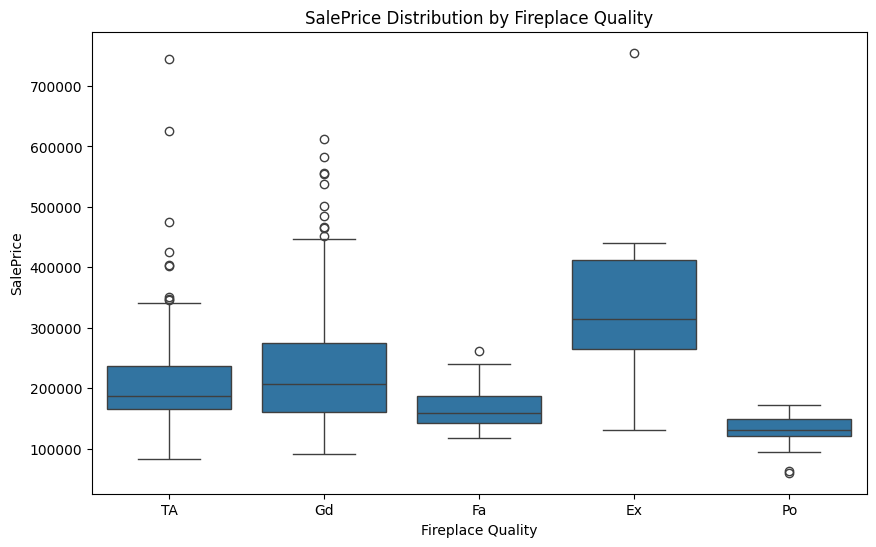

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of 'SalePrice' by 'FireplaceQu'
plt.figure(figsize=(10, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=df)
plt.title('SalePrice Distribution by Fireplace Quality')
plt.xlabel('Fireplace Quality')
plt.ylabel('SalePrice')
plt.show()

#It appears that there is a relationship between the quality of the fireplace and the sale price, with higher quality fireplaces generally associated with higher sale prices. So not dropping though it has higher missing values.

#Find a correlation of LotFrontage with SalesPrice to decide on its missing values

In [ ]:
# Calculate the correlation between 'SalePrice' and 'LotFrontage'
lotFrontage_correlation = df['SalePrice'].corr(df['LotFrontage'])

print(f"Correlation between SalePrice and LotFrontage: {lotFrontage_correlation:.4f}")

Correlation between SalePrice and LotFrontage: 0.3518


#since feature LotFrontage got a moderate correlation with Sales Price, keeping this for further evaluation

#Add a missing flag for future refference

In [ ]:
df['missing_flag'] = df.isnull().any(axis=1).astype(int)

In [ ]:
missing_rows = df[df['missing_flag'] == 1]
display(missing_rows)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
5        6          50       RL         85.0    14115   Pave      IR1   
7        8          60       RL          NaN    10382   Pave      IR1   
10      11          20       RL         70.0    11200   Pave      Reg   
12      13          20       RL          NaN    12968   Pave      IR2   
...    ...         ...      ...          ...      ...    ...      ...   
1452  1453         180       RM         35.0     3675   Pave      Reg   
1453  1454          20       RL         90.0    17217   Pave      Reg   
1454  1455          20       FV         62.0     7500   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea MiscVal MoSold  \
0            Lvl    AllPub    Inside  ...           0        0       0      2   
5            Lvl    AllPub    Inside  ...           0        0     700     10   
7            Lvl    AllPub    Corner  ...           0        0     350     11   
10           Lvl    AllPub    Inside  ...           0        0       0      2   
12           Lvl    AllPub    Inside  ...         176        0       0      9   
...          ...       ...       ...  ...         ...      ...     ...    ...   
1452         Lvl    AllPub    Inside  ...           0        0       0      5   
1453         Lvl    AllPub    Inside  ...           0        0       0      7   
1454         Lvl    AllPub    Inside  ...           0        0       0     10   
1458         Lvl    AllPub    Inside  ...           0        0       0      4   
1459         Lvl    AllPub    Inside  ...           0        0       0      6   

     YrSold SaleType  SaleCondition  SalePrice  student_random_feature  \
0      2008       WD         Normal     208500                      27   
5      2009       WD         Normal     143000                      76   
7      2009       WD         Normal     200000                      47   
10     2008       WD         Normal     129500                      14   
12     2008       WD         Normal     144000                      79   
...     ...      ...            ...        ...                     ...   
1452   2006       WD         Normal     145000                      96   
1453   2006       WD        Abnorml      84500                      36   
1454   2009       WD         Normal     185000                      50   
1458   2010       WD         Normal     142125                      95   
1459   2008       WD         Normal     147500                      87   

      missing_flag  
0                1  
5                1  
7                1  
10               1  
12               1  
...            ...  
1452             1  
1453             1  
1454             1  
1458             1  
1459             1  

[877 rows x 78 columns]

## Listing columns with missing values




In [ ]:
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

display(missing_info[missing_info['Missing Count'] > 0])

Missing Count  Missing Percentage
LotFrontage             259           17.739726
MasVnrArea                8            0.547945
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247
BsmtFinType2             38            2.602740
Electrical                1            0.068493
FireplaceQu             690           47.260274
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945

#Find a correlation between Numerical values and sales price

In [ ]:
# Drop columns for correlation analysis
df_subset = df.drop(columns=['Id', 'missing_flag'])

# Select only numerical columns for correlation
numerical_df_subset = df_subset.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df_subset.corr()

# Get correlations with 'SalePrice' and sort them
rental_price_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("Correlation with Sales Price ")
display(rental_price_correlations)

Correlation with Sales Price 


SalePrice                 1.000000
OverallQual               0.790982
GrLivArea                 0.708624
GarageCars                0.640409
GarageArea                0.623431
TotalBsmtSF               0.613581
1stFlrSF                  0.605852
FullBath                  0.560664
TotRmsAbvGrd              0.533723
YearBuilt                 0.522897
YearRemodAdd              0.507101
GarageYrBlt               0.486362
MasVnrArea                0.477493
Fireplaces                0.466929
BsmtFinSF1                0.386420
LotFrontage               0.351799
WoodDeckSF                0.324413
2ndFlrSF                  0.319334
OpenPorchSF               0.315856
HalfBath                  0.284108
LotArea                   0.263843
BsmtFullBath              0.227122
BsmtUnfSF                 0.214479
BedroomAbvGr              0.168213
ScreenPorch               0.111447
PoolArea                  0.092404
MoSold                    0.046432
3SsnPorch                 0.044584
student_random_feature    0.016083
BsmtFinSF2               -0.011378
BsmtHalfBath             -0.016844
MiscVal                  -0.021190
LowQualFinSF             -0.025606
YrSold                   -0.028923
OverallCond              -0.077856
MSSubClass               -0.084284
EnclosedPorch            -0.128578
KitchenAbvGr             -0.135907
Name: SalePrice, dtype: float64

#Finding out correlation between attributes

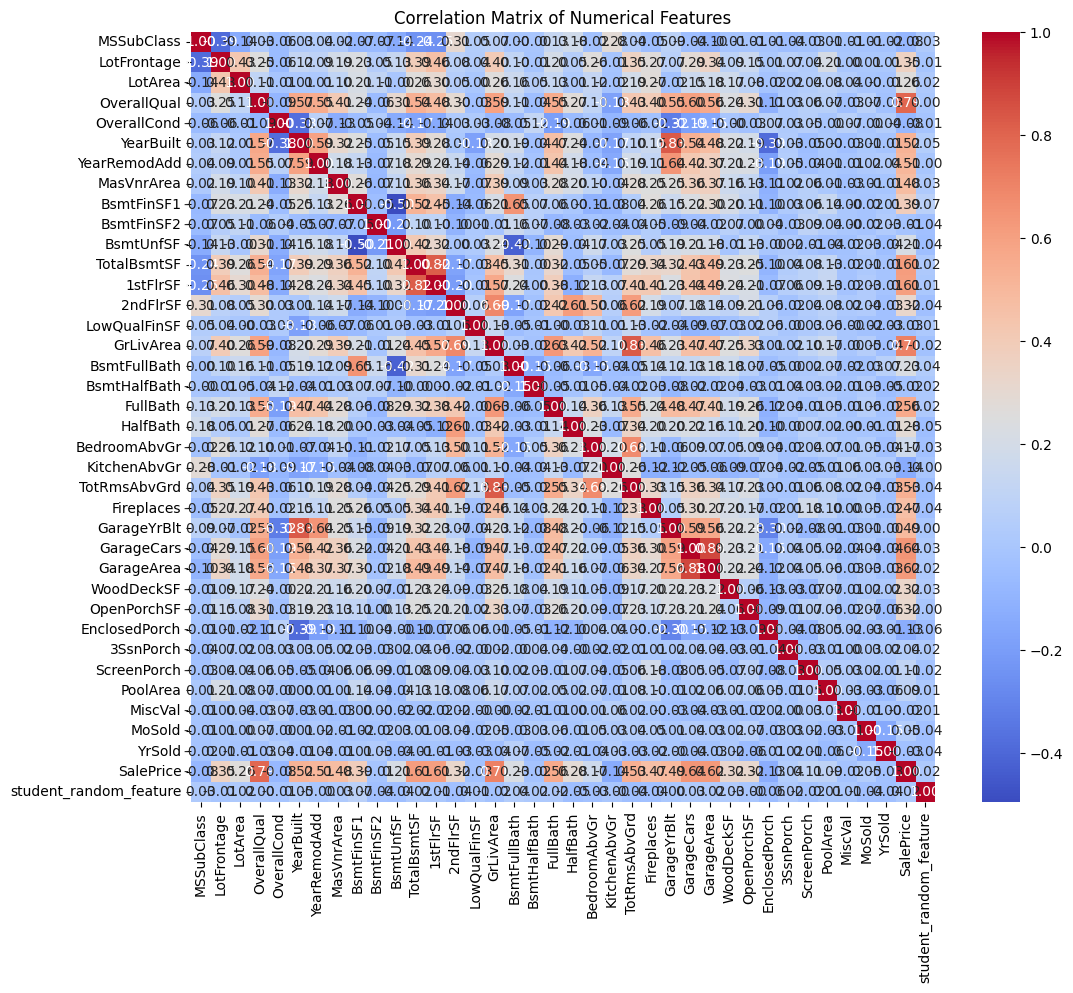

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Find a correlated features with index more than 0.8(std benchmark to consider high correlation)

In [ ]:
# Compute correlations
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Extract high correlations (|r| > 0.8)
high_corr = [(a, b) for a, b in corr_pairs.index if corr_pairs[(a, b)] > 0.8 and a != b]

# Remove duplicates by converting each pair to a frozenset (unordered pair)
unique_corr = list({frozenset((a, b)): (a, b) for a, b in high_corr}.values())

# Show top correlated unique pairs
print("Highly correlated column pairs (|r| > 0.8):")
display(unique_corr)

Highly correlated column pairs (|r| > 0.8):


[('GarageCars', 'GarageArea'),
 ('YearBuilt', 'GarageYrBlt'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('1stFlrSF', 'TotalBsmtSF')]

#Drop the hihgly correlated features like GarageCars, GarageYrBlt,TotalRmsAbvGrd,TotalBsmtSF

In [ ]:
columns_to_drop_high_corr = ['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF']
df = df.drop(columns=columns_to_drop_high_corr, errors='ignore')

print(f"Dropped columns: {columns_to_drop_high_corr}")
display(df.head())

Dropped columns: ['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF']


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... ScreenPorch PoolArea MiscVal MoSold YrSold  \
0    AllPub    Inside  ...           0        0       0      2   2008   
1    AllPub       FR2  ...           0        0       0      5   2007   
2    AllPub    Inside  ...           0        0       0      9   2008   
3    AllPub    Corner  ...           0        0       0      2   2006   
4    AllPub       FR2  ...           0        0       0     12   2008   

  SaleType  SaleCondition  SalePrice  student_random_feature  missing_flag  
0       WD         Normal     208500                      27             1  
1       WD         Normal     181500                      91             0  
2       WD         Normal     223500                      74             0  
3       WD        Abnorml     140000                       8             0  
4       WD         Normal     250000                      26             0  

[5 rows x 74 columns]

## Visualize Rental Price Distribution against categorical values by box plot to check influence of SalesPrice with their different values

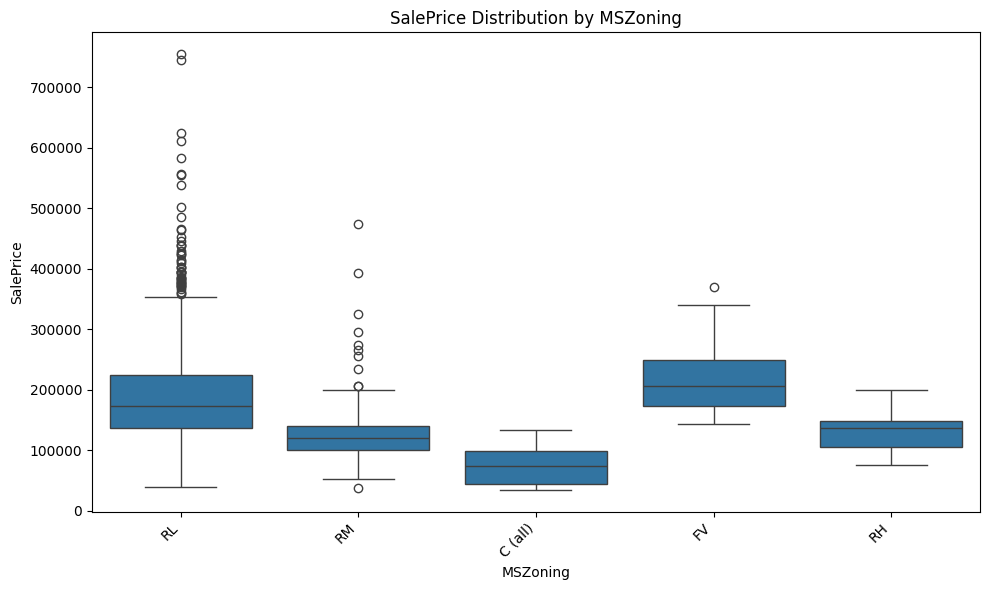

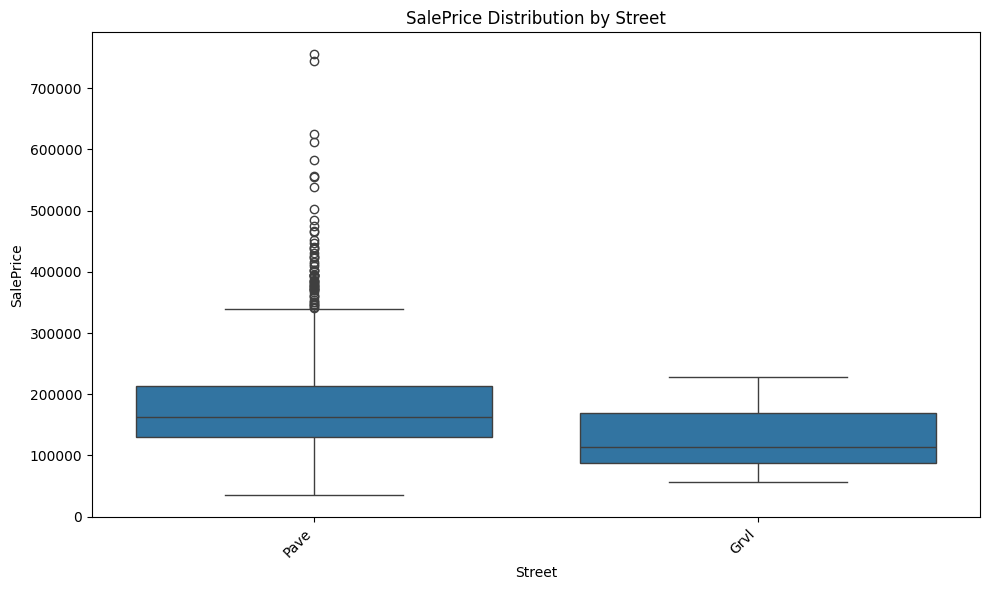

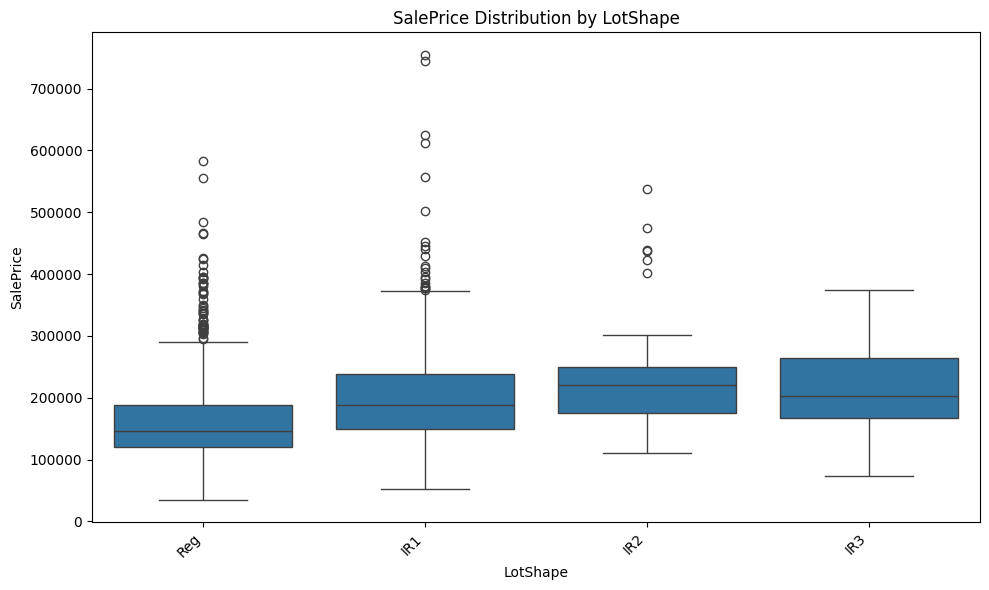

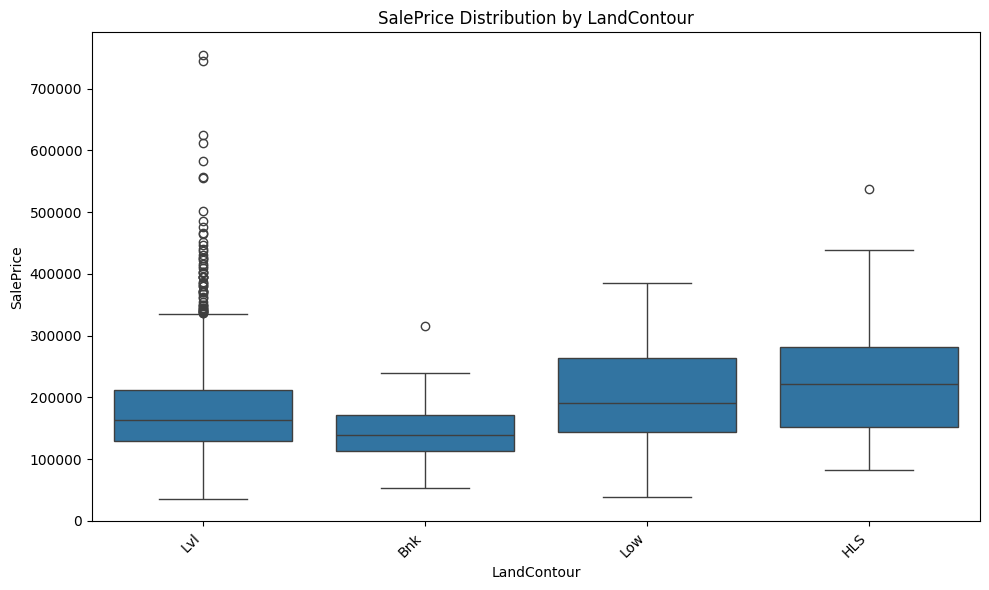

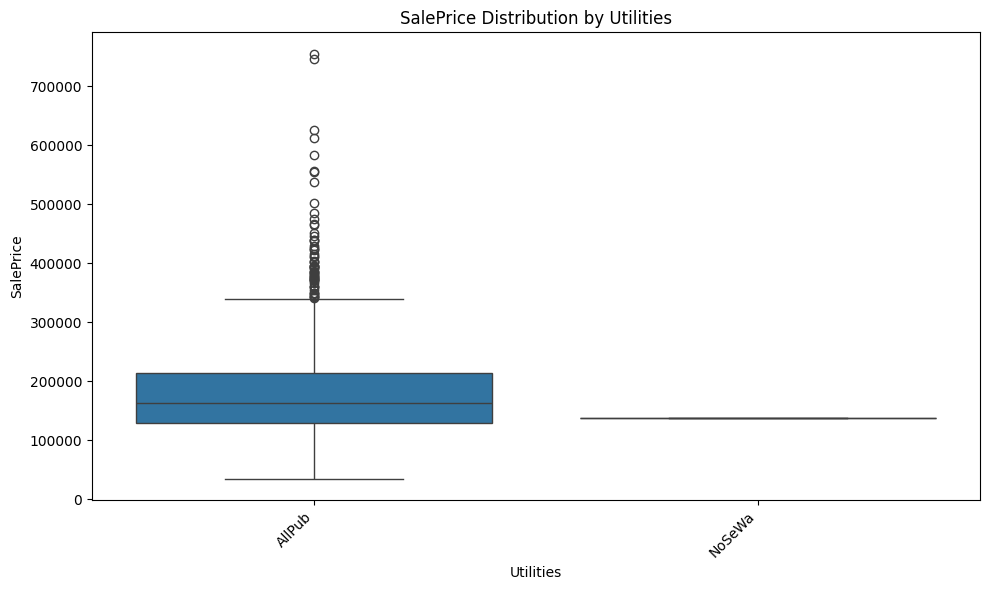

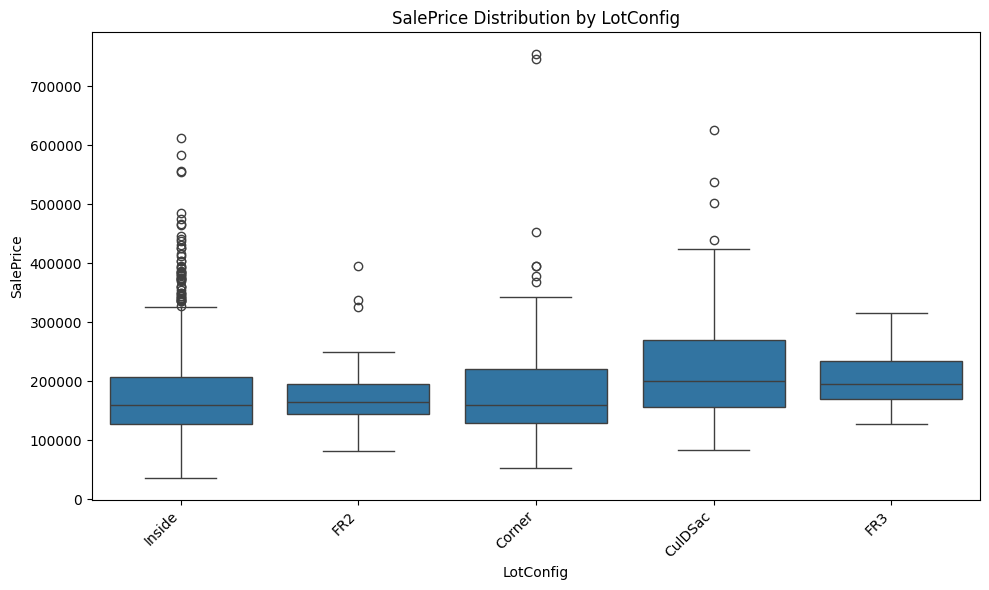

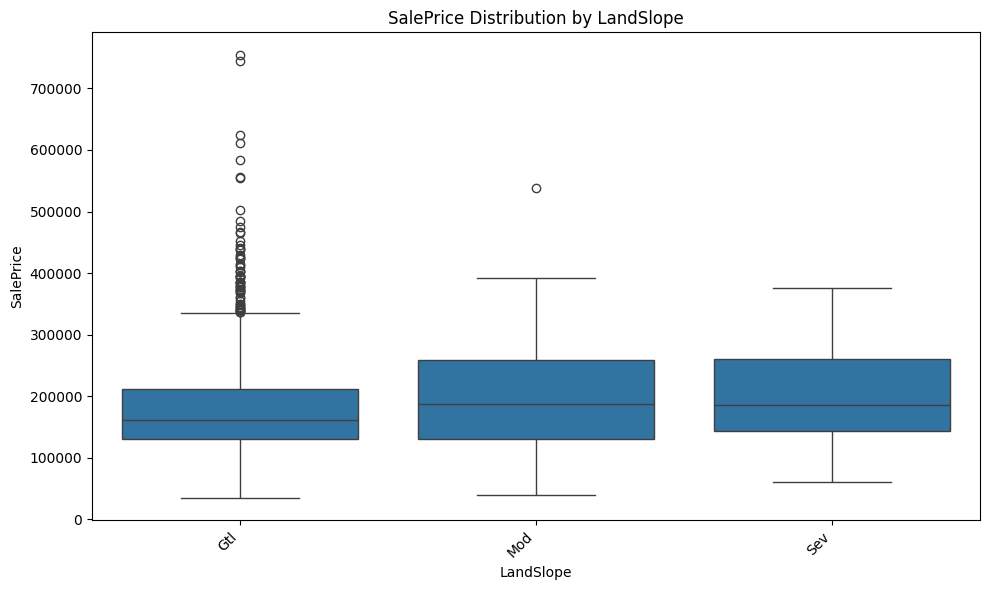

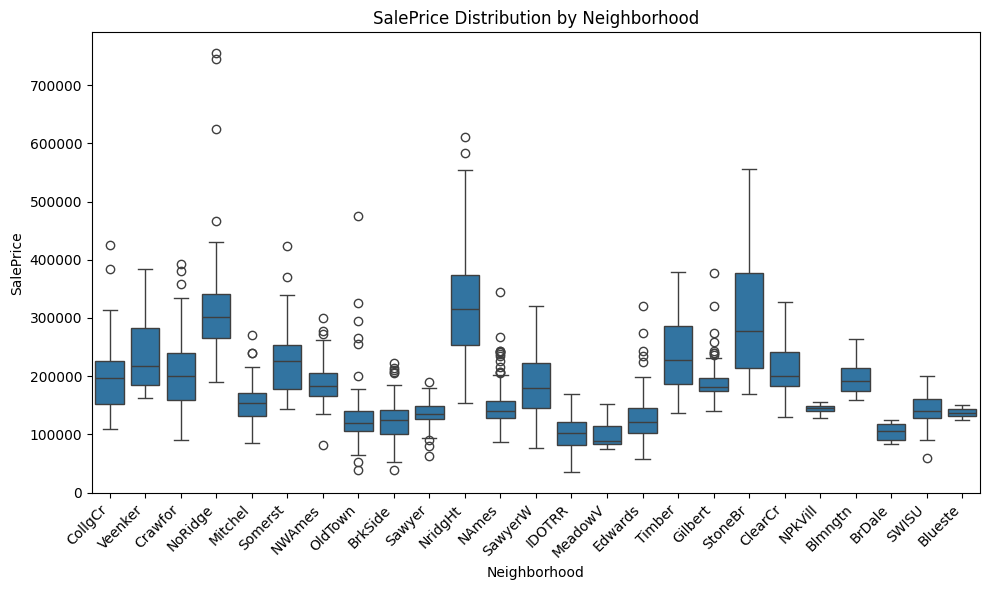

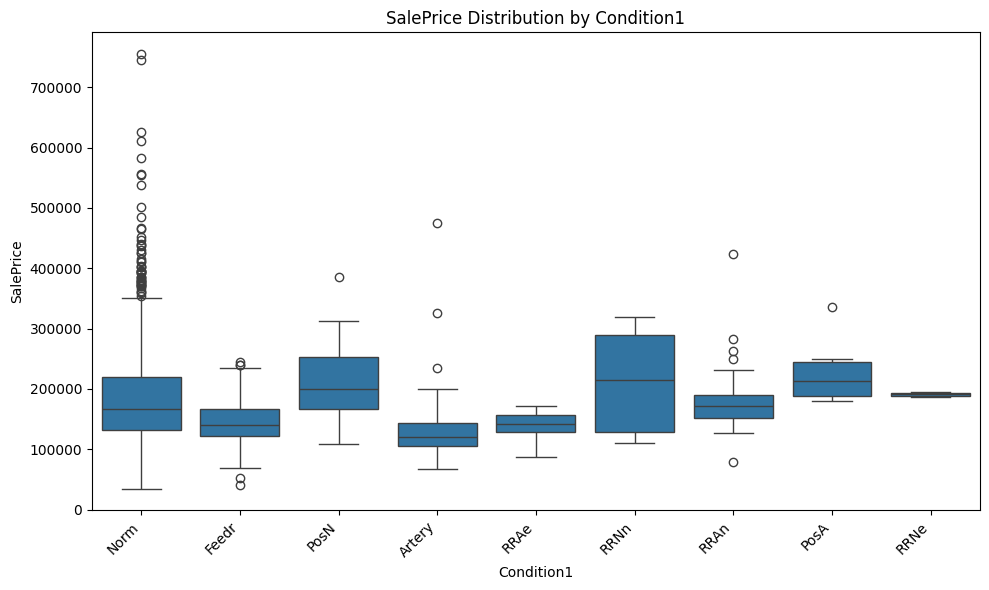

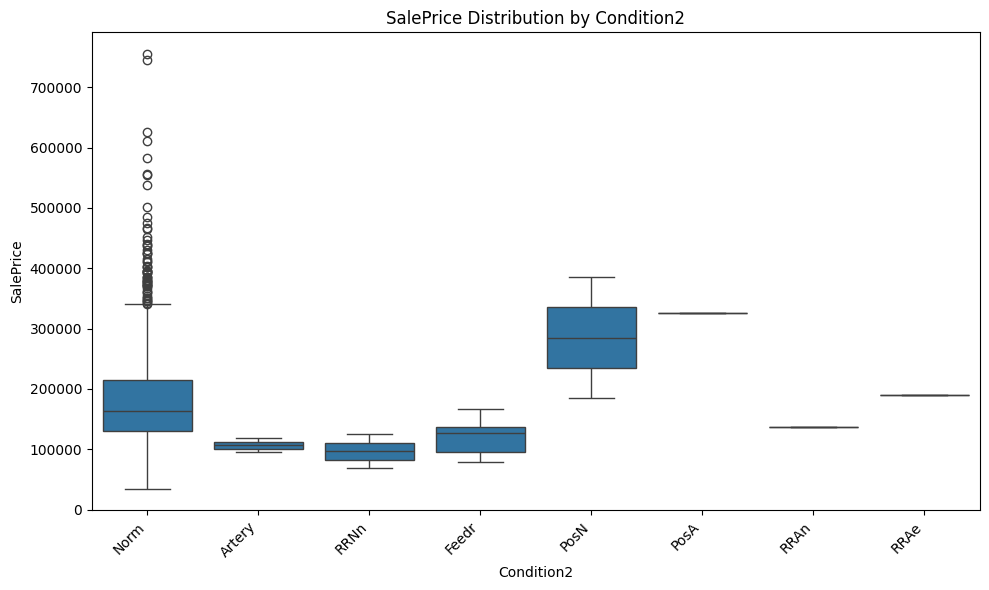

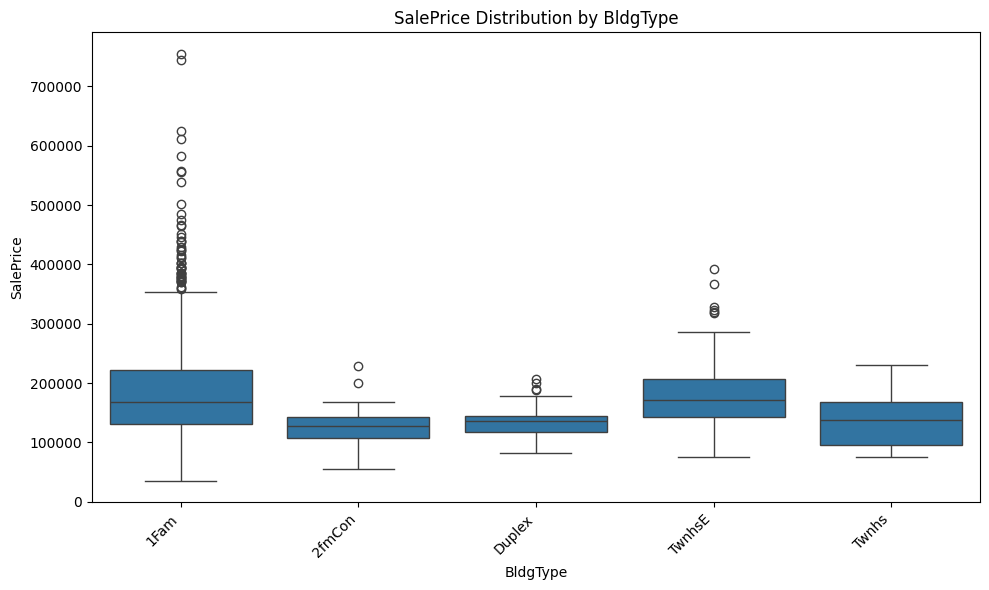

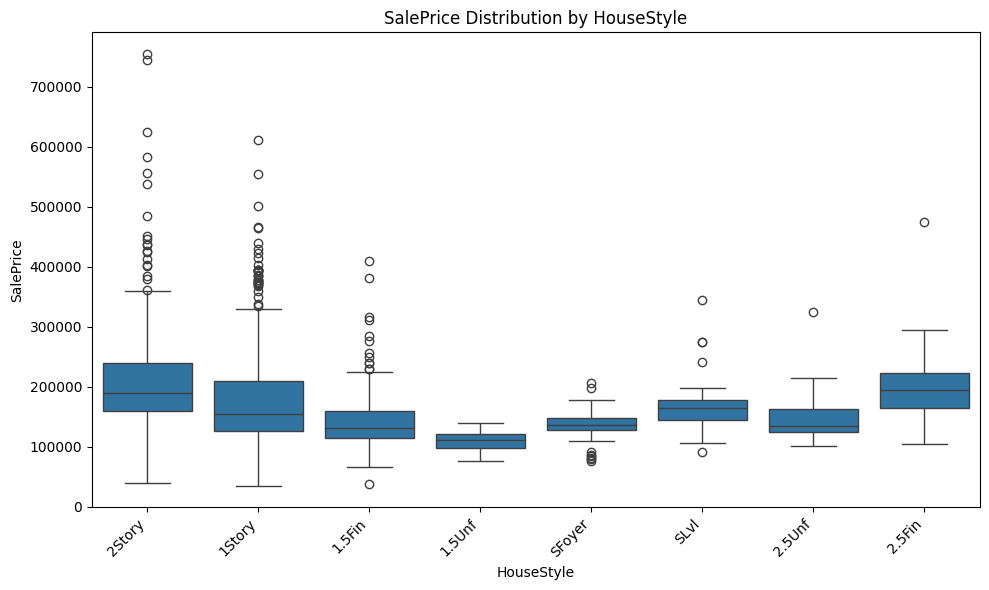

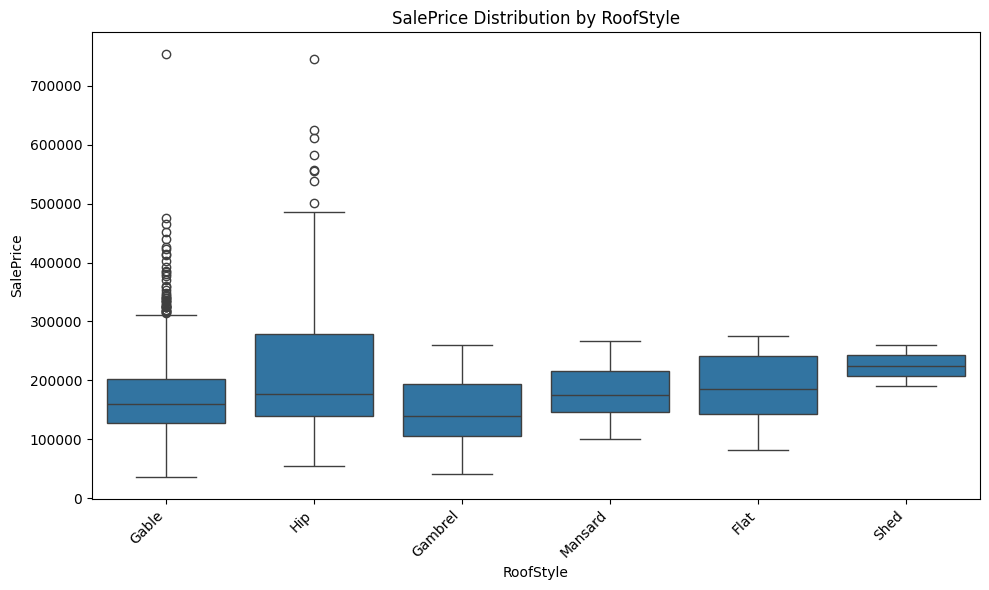

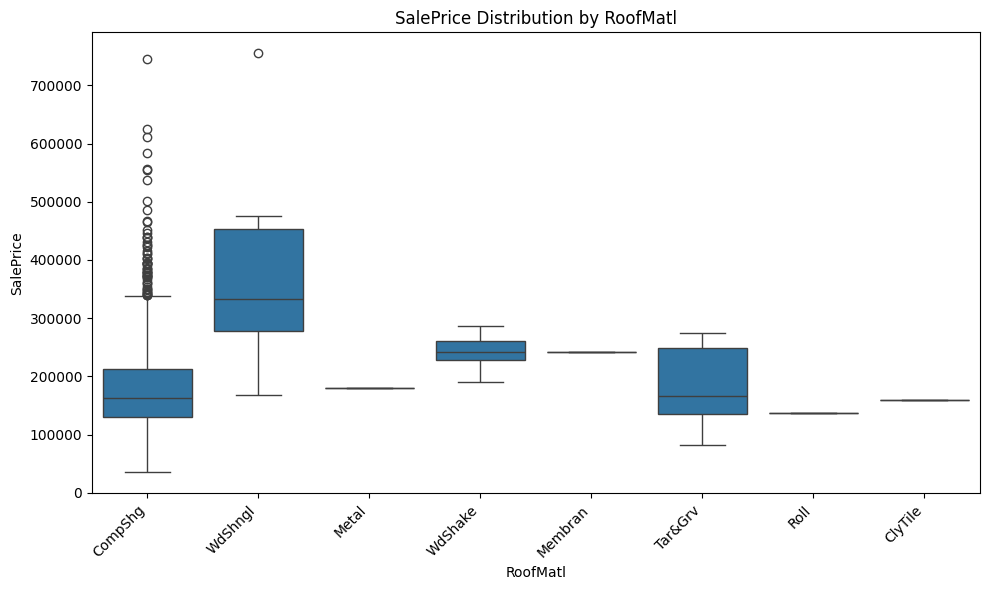

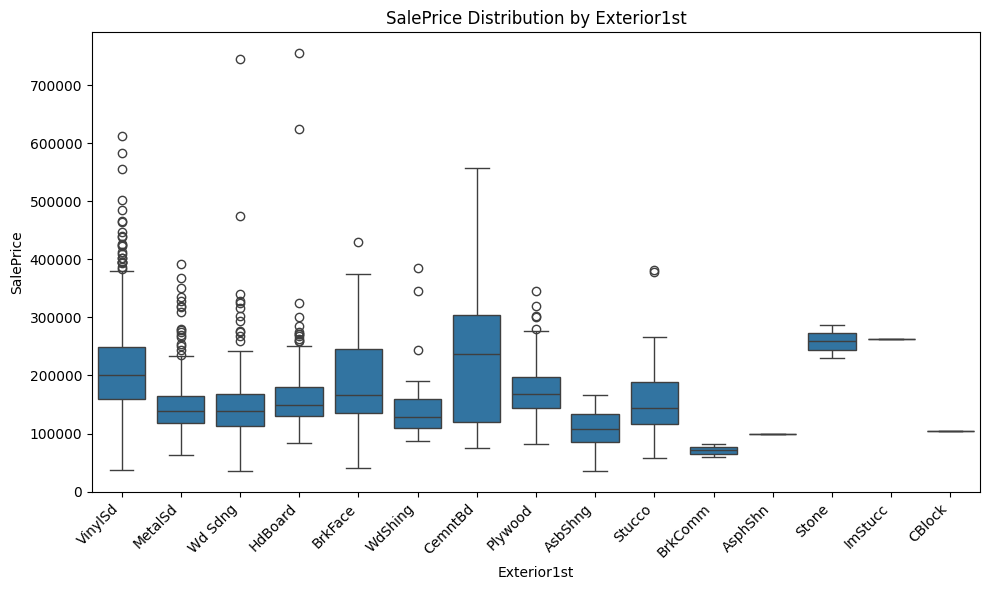

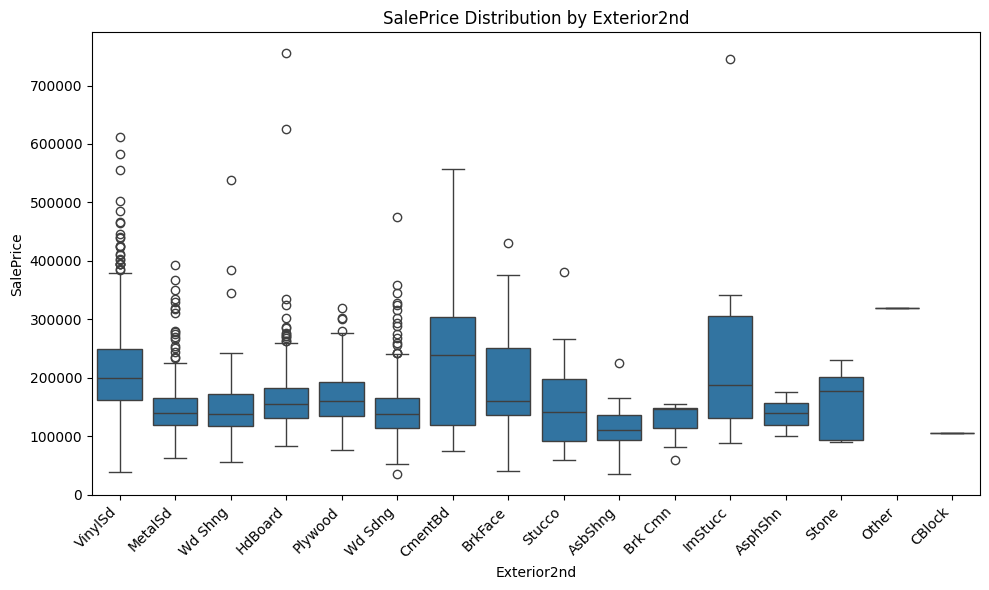

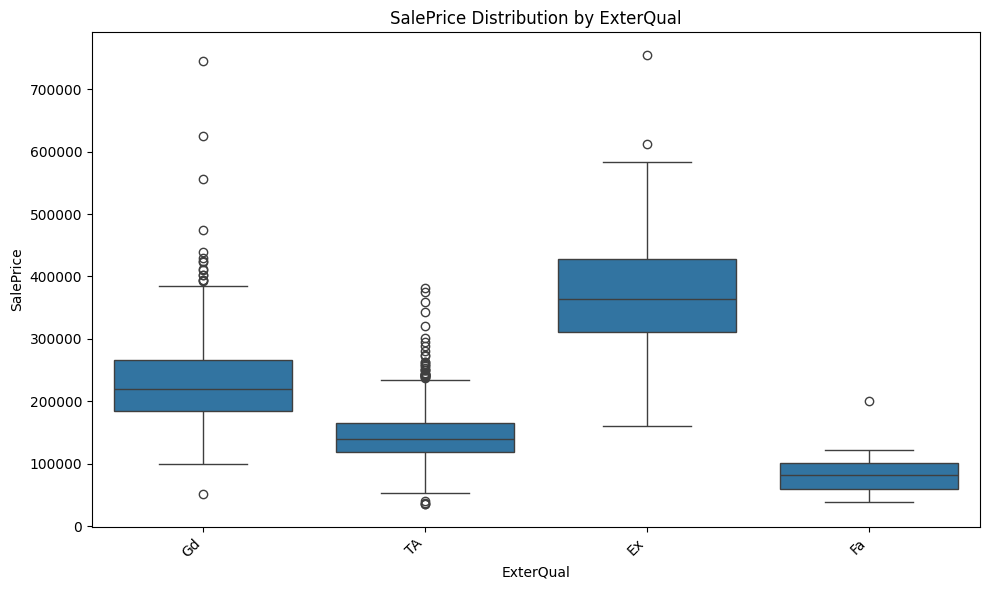

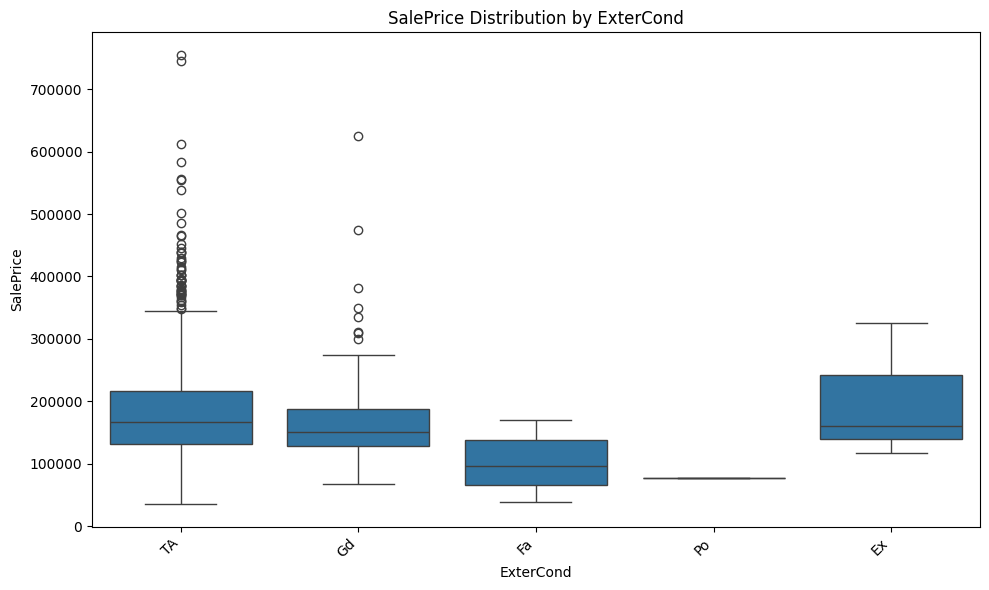

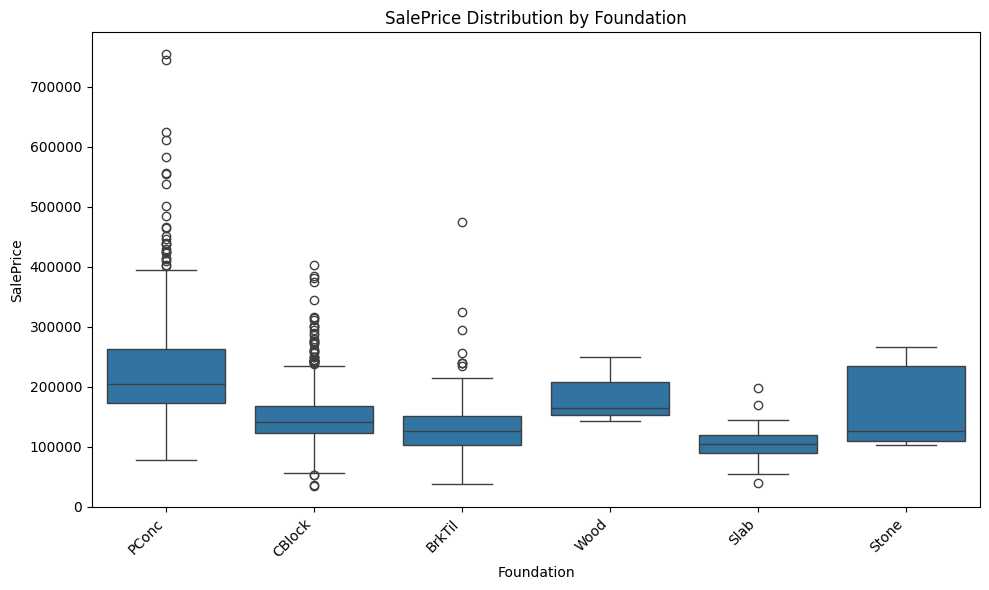

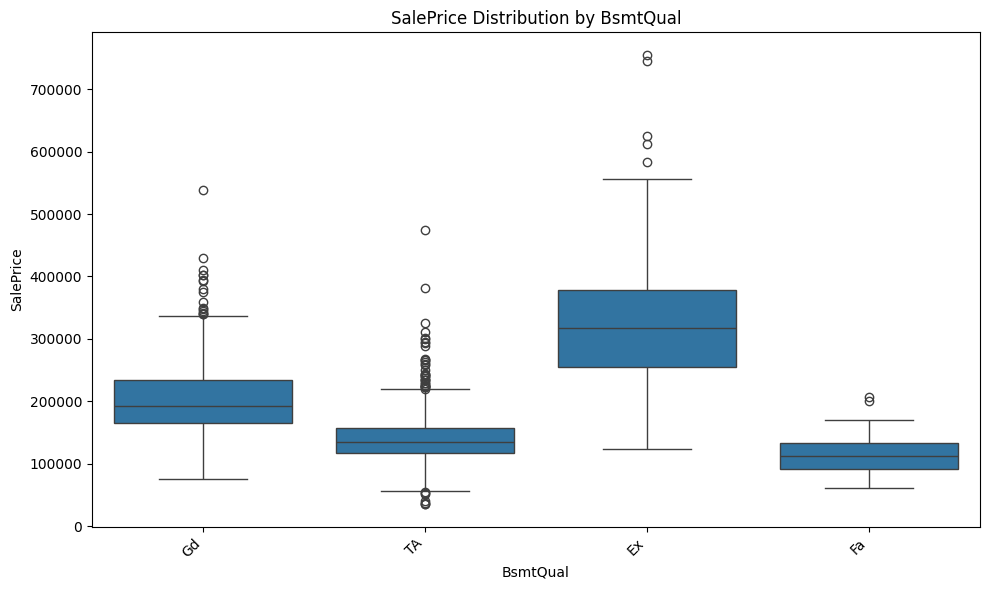

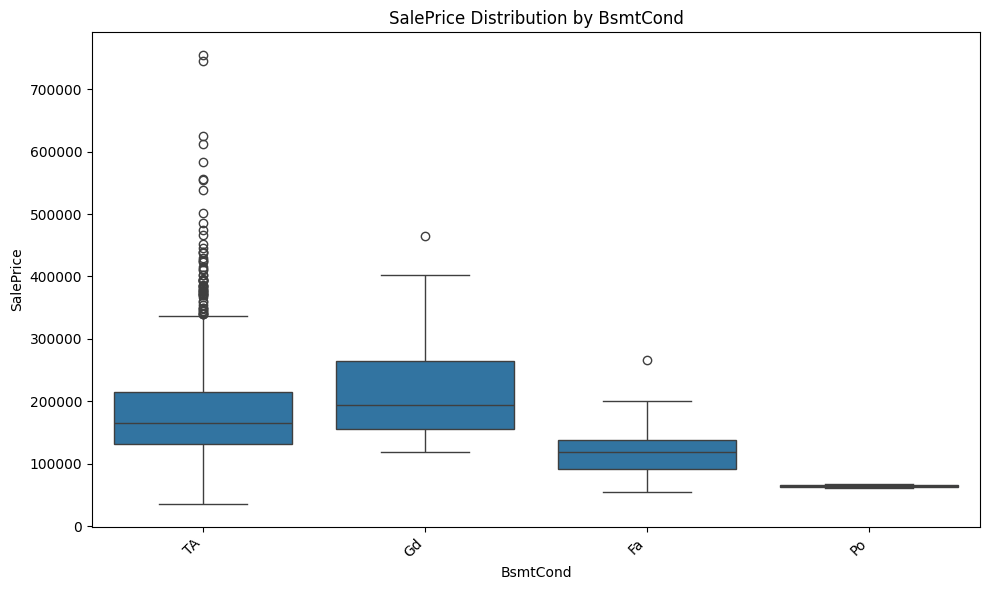

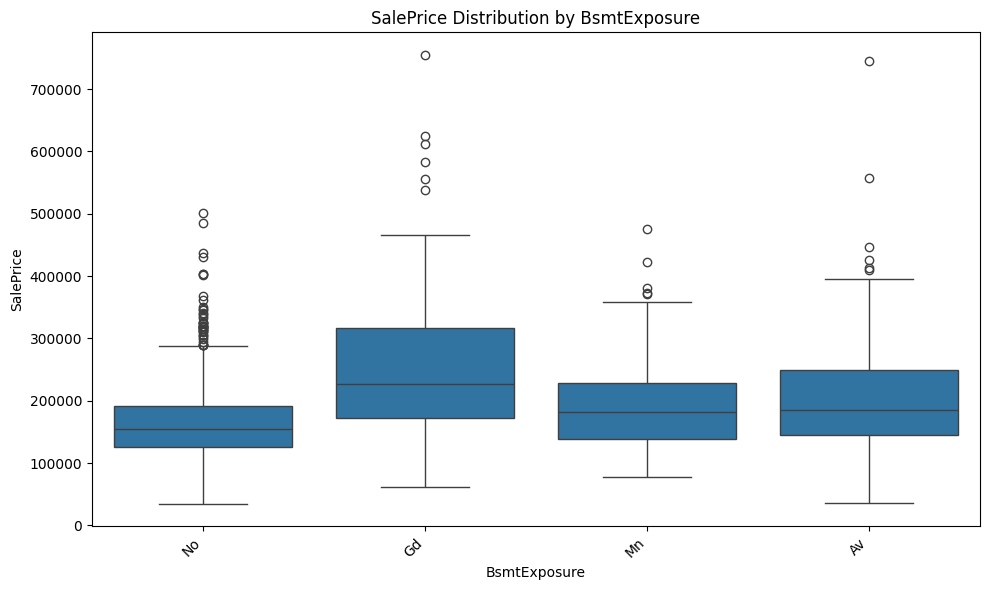

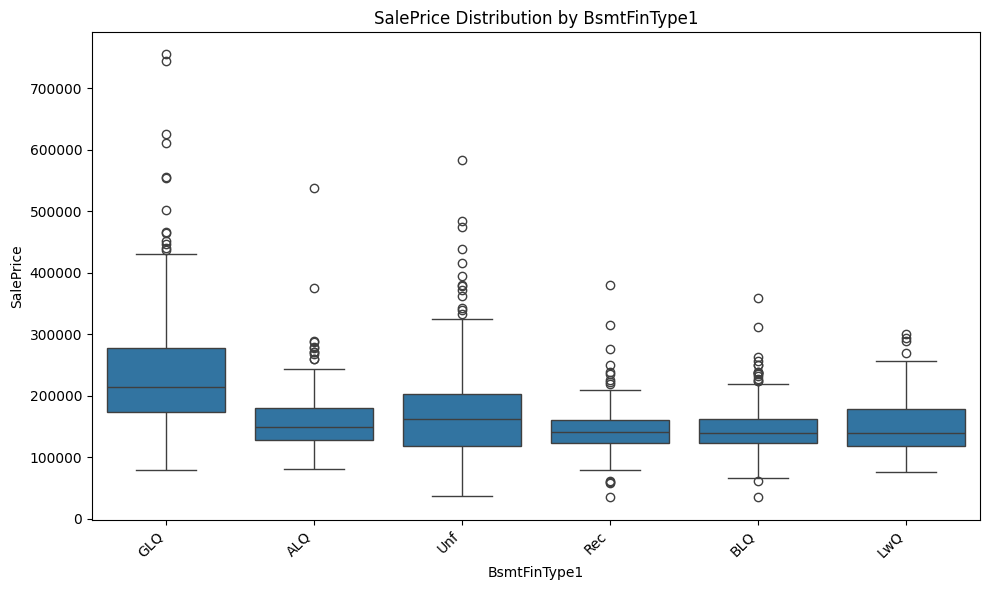

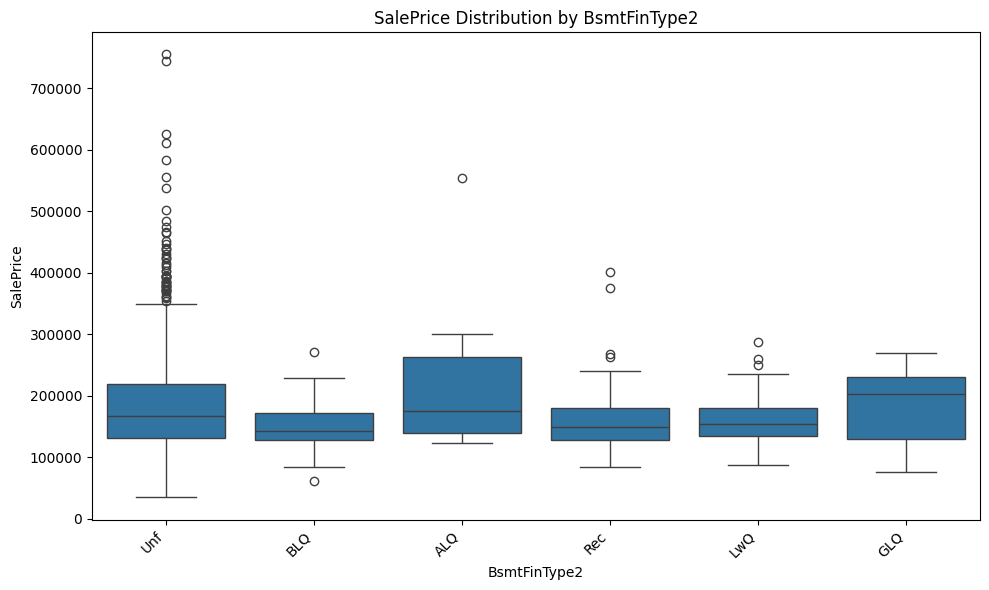

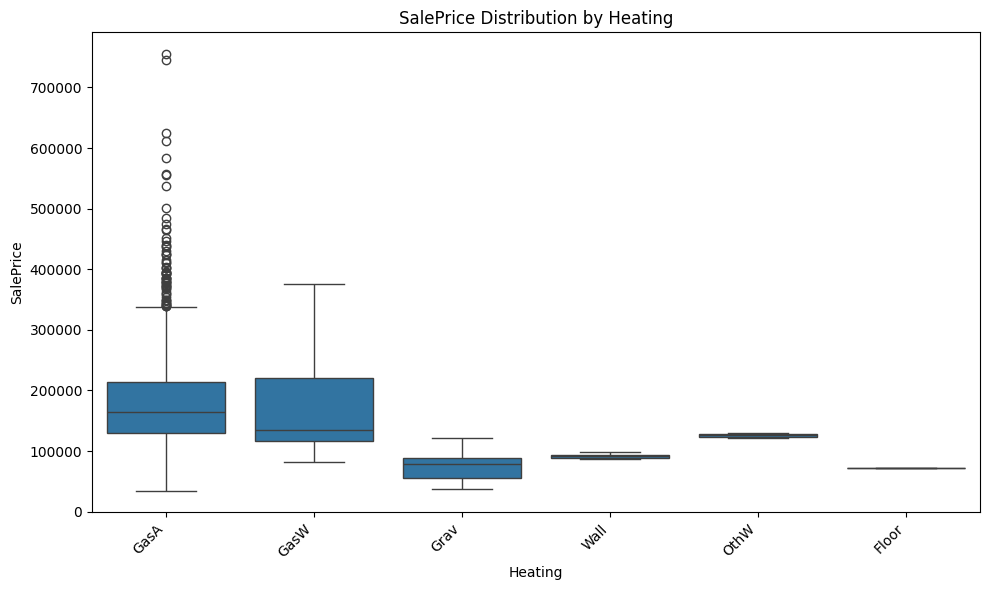

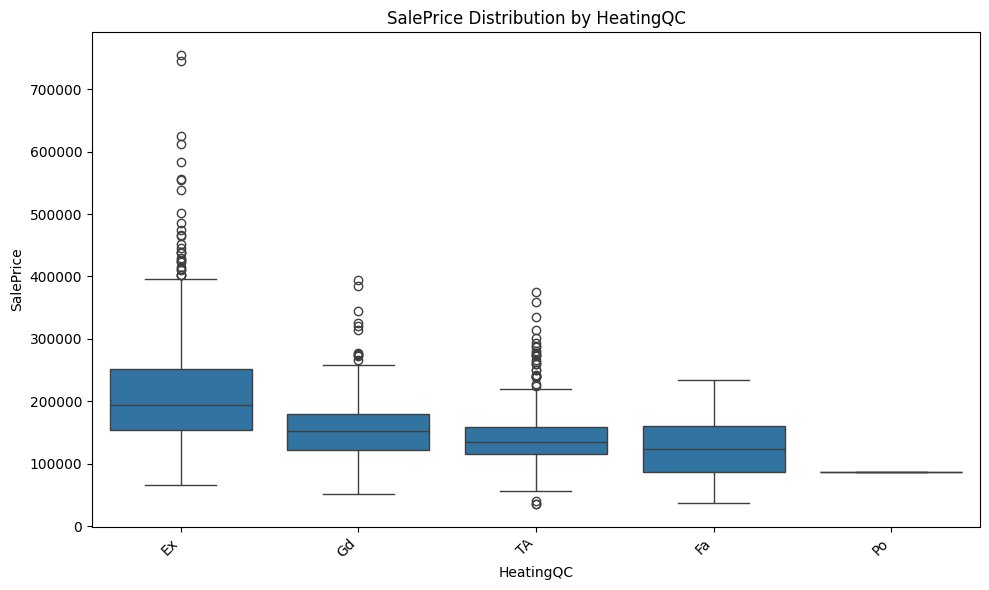

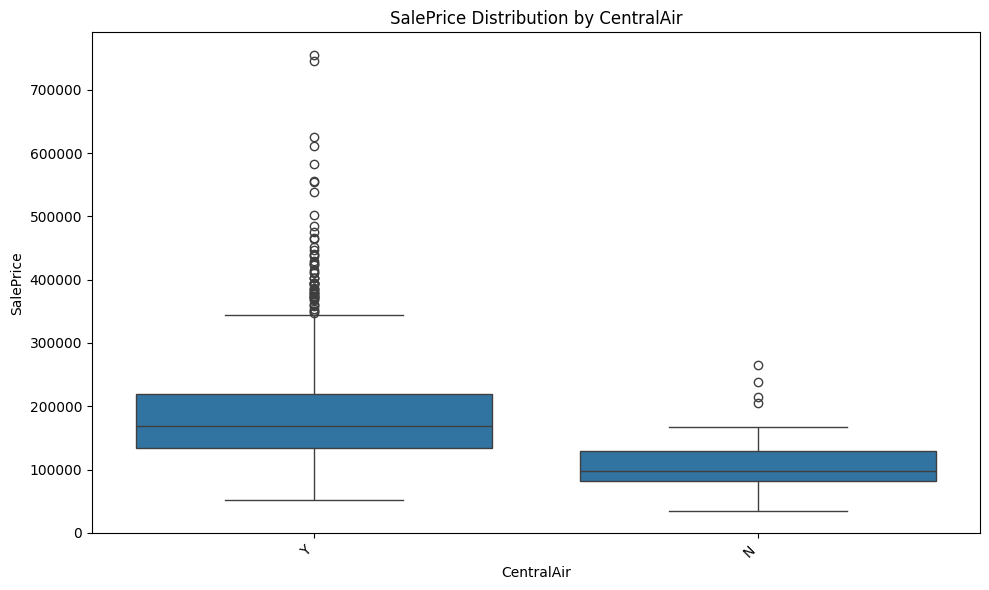

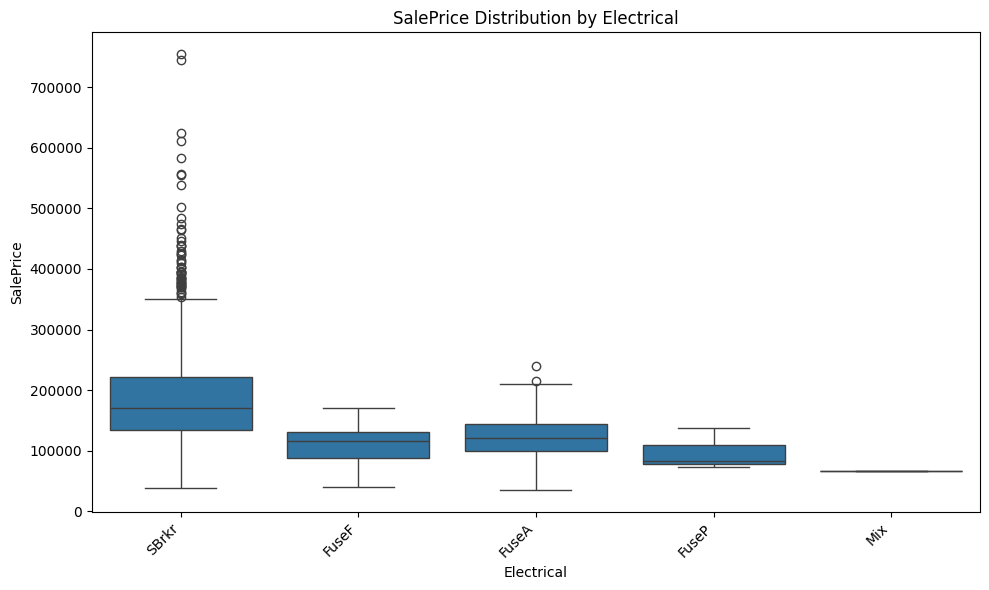

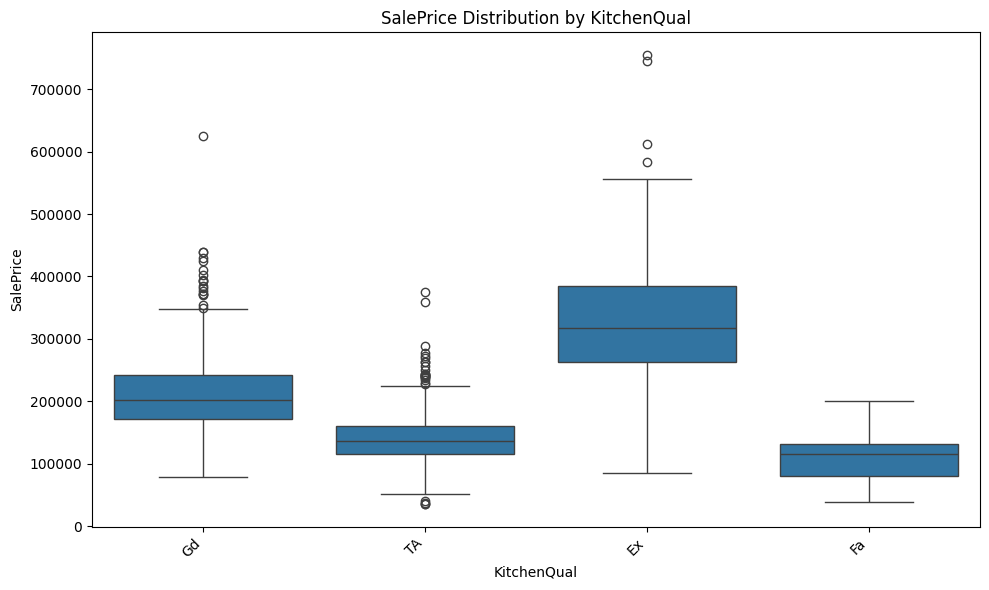

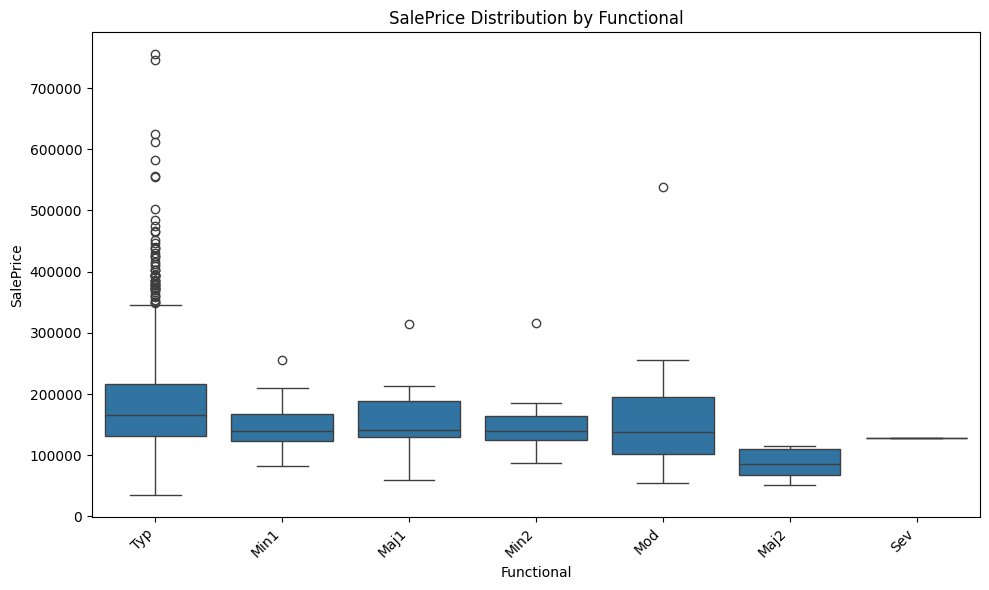

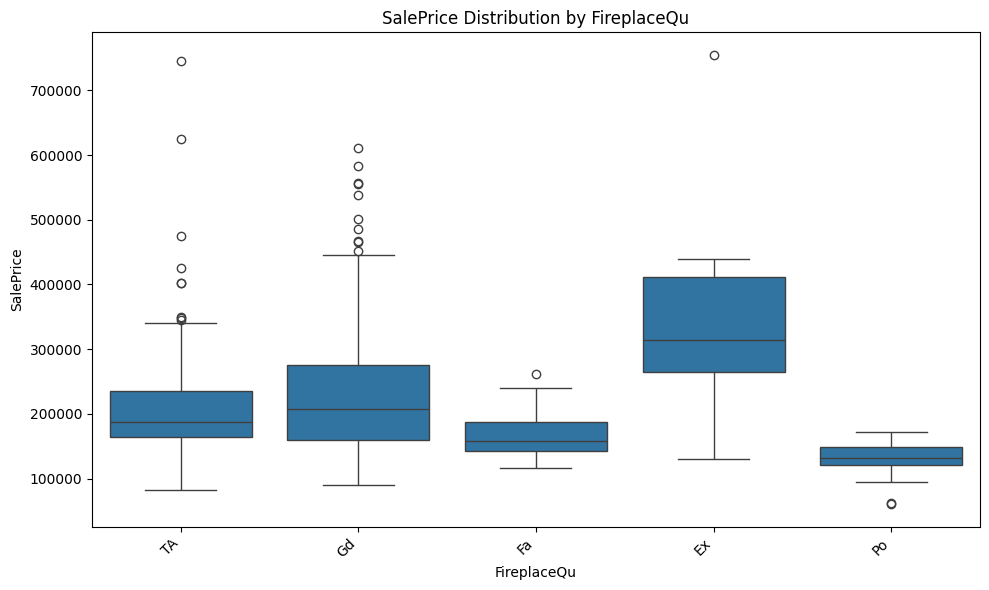

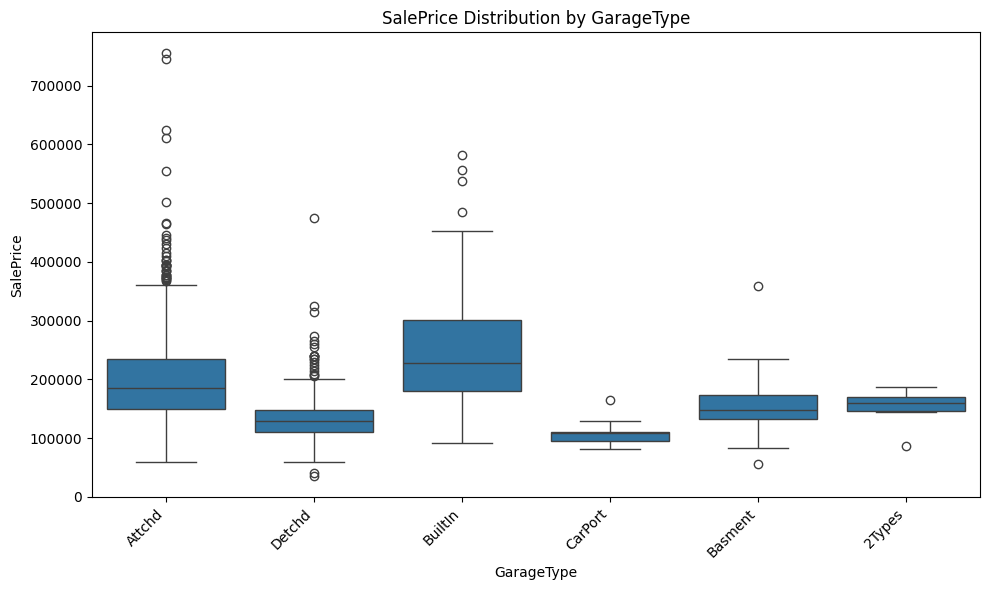

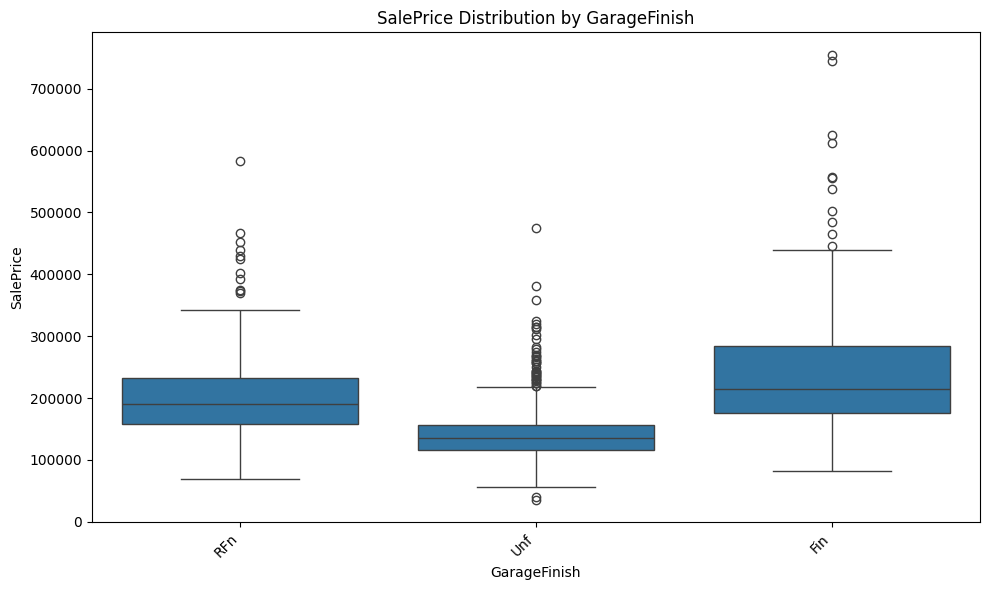

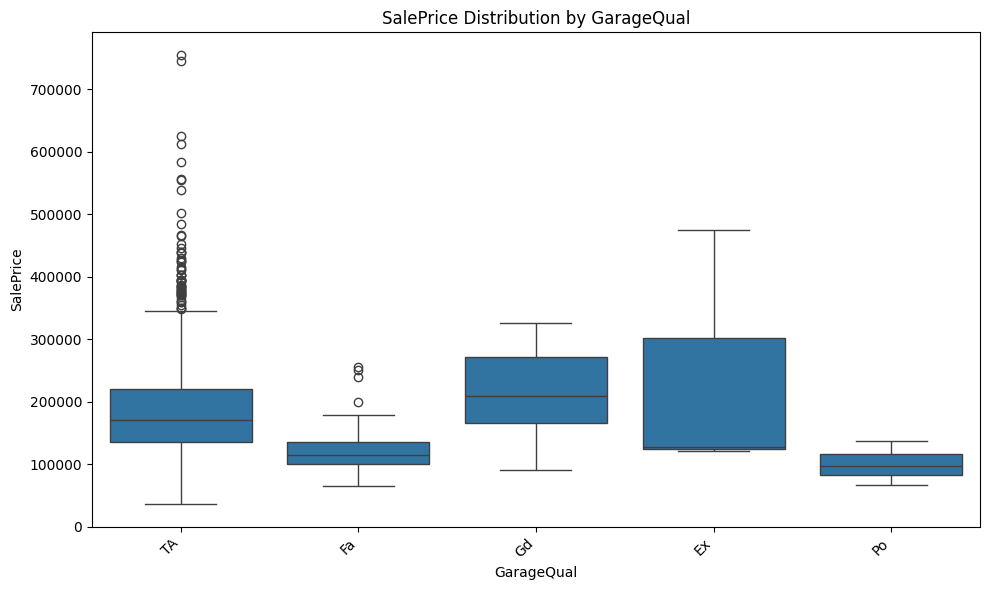

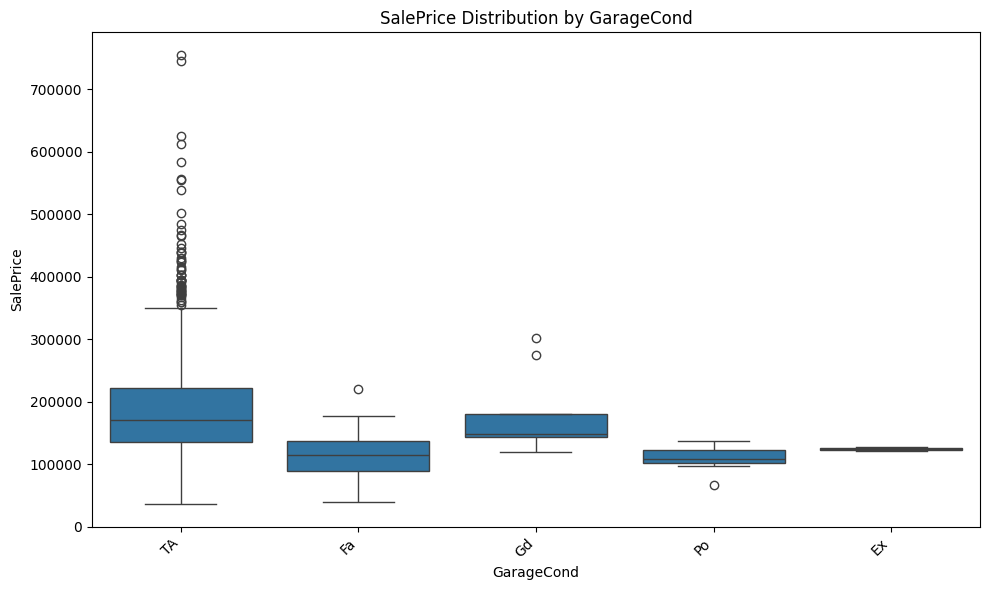

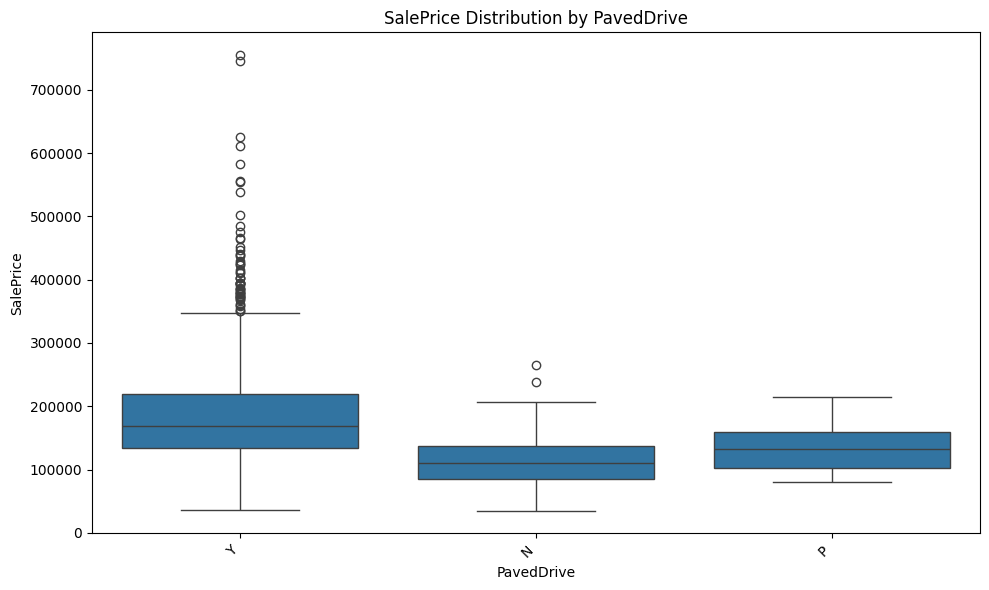

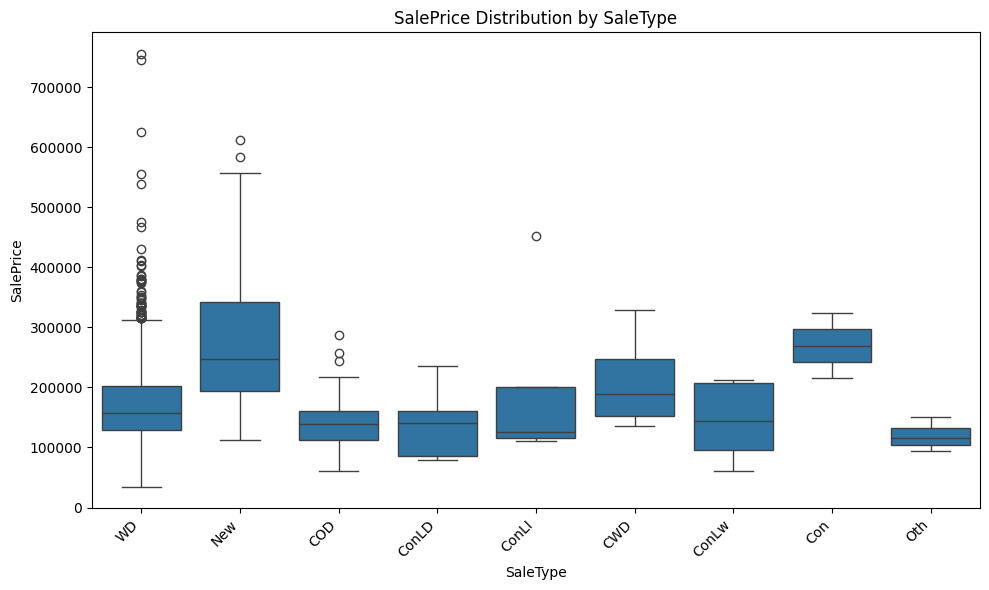

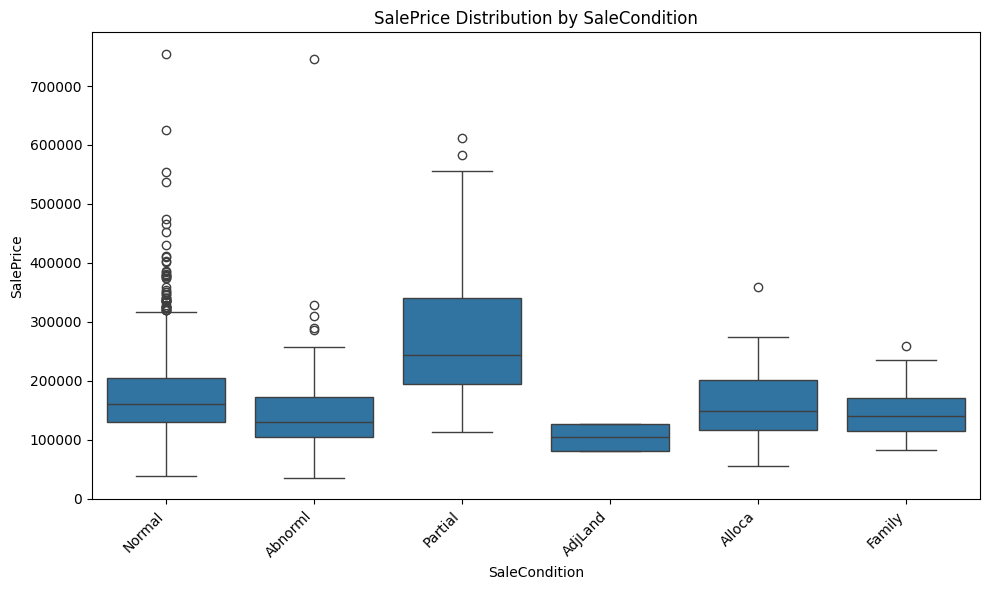

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns (object type) excluding those with too many unique values or identifiers
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude columns that are not suitable for individual box plots due to high cardinality or being identifiers
# Based on previous analysis, 'Location', 'Amenities', 'Nearby Schools', 'Utilities Included', 'Property ID', 'Unnamed: 0' might have high cardinality or are identifiers.
# Let's check the number of unique values again or rely on prior knowledge from the notebook.
# Assuming from previous steps that 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition' are potential candidates.
# We should exclude columns with very high cardinality like 'Location', 'Amenities', 'Nearby Schools', 'Utilities Included'.

# Let's refine the list of categorical columns for box plots based on typical house price features and reasonable cardinality
categorical_cols_for_plotting = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PavedDrive', 'SaleType', 'SaleCondition'
]

# Ensure the columns exist in the current DataFrame
categorical_cols_for_plotting = [col for col in categorical_cols_for_plotting if col in df.columns]


for col in categorical_cols_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'SalePrice Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

#The caetegory values are having vairence against the sales price. Hence these Categorical features can stay for further evaluation

#Filling missing values

#First: Find missing count and percentage

In [ ]:
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

display(missing_info[missing_info['Missing Count'] > 0])

Missing Count  Missing Percentage
LotFrontage             259           17.739726
MasVnrArea                8            0.547945
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247
BsmtFinType2             38            2.602740
Electrical                1            0.068493
FireplaceQu             690           47.260274
GarageType               81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945

#Creating new category 'Missing' for FireplaceQu since it got 47% missing values but they are highly related to SalesPrice.

In [ ]:
# Impute missing values in 'FireplaceQu' with the new category 'Missing'
df['FireplaceQu'] = df['FireplaceQu'].fillna('Missing')

# Verify the imputation
print("Value counts for 'FireplaceQu' after imputation:")
display(df['FireplaceQu'].value_counts())

# Display the number of missing values in the DataFrame to see the change
print("\nMissing values count after imputing 'FireplaceQu':")
display(df.isnull().sum()[df.isnull().sum() > 0])

Value counts for 'FireplaceQu' after imputation:


FireplaceQu
Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: count, dtype: int64


Missing values count after imputing 'FireplaceQu':


LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#Use Media value to fill missing values in numerical column

In [ ]:
# Impute numerical columns with the median
numerical_cols_to_impute = ['LotFrontage', 'MasVnrArea']
for col in numerical_cols_to_impute:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
        print(f"Imputed missing values in '{col}' with the median.")

Imputed missing values in 'LotFrontage' with the median.
Imputed missing values in 'MasVnrArea' with the median.


#Fill missing values of categorical value with Mode

In [ ]:
# Impute categorical columns with the mode (most frequent) or a 'None' category
categorical_cols_to_impute = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
]

print(f"Imputed missing values in '{col}' with the median.")

for col in categorical_cols_to_impute:
    if col in df.columns:
        # For basement and garage features, 'None' might be more appropriate than mode
        if col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
             df[col] = df[col].fillna('None')
             print(f"Imputed missing values in '{col}' with 'None'.")
        else: # For Electrical, use the mode
            mode_val = df[col].mode()[0] # mode() can return multiple values if there's a tie
            df[col] = df[col].fillna(mode_val)
            print(f"Imputed missing values in '{col}' with the mode ({mode_val}).")



Imputed missing values in 'GarageCond' with the median.
Imputed missing values in 'BsmtQual' with 'None'.
Imputed missing values in 'BsmtCond' with 'None'.
Imputed missing values in 'BsmtExposure' with 'None'.
Imputed missing values in 'BsmtFinType1' with 'None'.
Imputed missing values in 'BsmtFinType2' with 'None'.
Imputed missing values in 'Electrical' with the mode (SBrkr).
Imputed missing values in 'GarageType' with 'None'.
Imputed missing values in 'GarageFinish' with 'None'.
Imputed missing values in 'GarageQual' with 'None'.
Imputed missing values in 'GarageCond' with 'None'.


#Check missing values after imputing

In [ ]:
# Verify that there are no more missing values
print("\nMissing values count after imputation:")
display(df.isnull().sum()[df.isnull().sum() > 0])


Missing values count after imputation:


Series([], dtype: int64)

# Outlier Detection (using Box Plots)

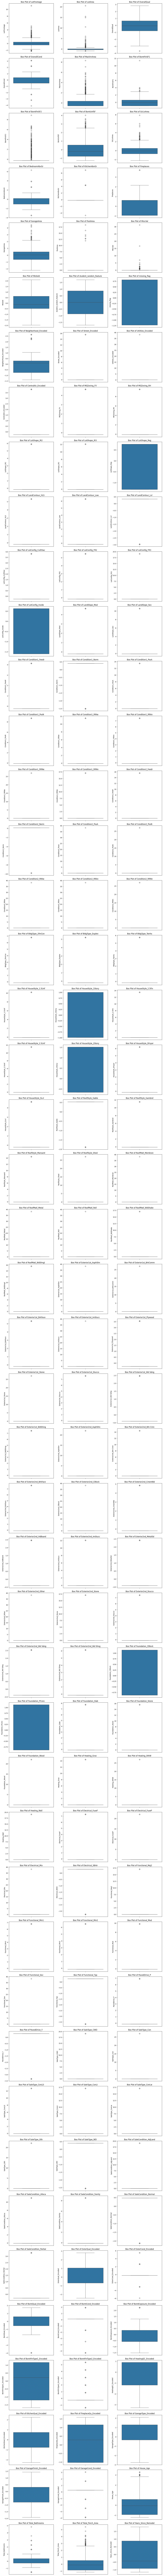

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding 'Id' and the target 'SalePrice' for plotting outliers)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_to_exclude_from_outliers = ['Id', 'SalePrice'] # Exclude identifiers and target
numerical_cols_for_outliers = [col for col in numerical_cols if col not in cols_to_exclude_from_outliers]

# Determine the number of plots and grid dimensions
n_cols = 3
n_rows = (len(numerical_cols_for_outliers) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#Steps for Feature Engineering
#Analyze cateogory feature value type and find a suitable encoding method to convert them into nemeric vectors

In [ ]:
object_cols = df.select_dtypes(include='object').columns
# Exclude 'Property ID' from the list of object columns to examine
cols_to_exclude = ['Id']
object_cols = object_cols.drop(cols_to_exclude, errors='ignore')

print("Object type columns:", object_cols.tolist())

print("\nDistinct values in object type columns:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    # Displaying a limited number of unique values to avoid overwhelming the output
    if df[col].nunique() > 50:
        print("First 50 distinct values:")
        display(df[col].unique()[:50])
    else:
        print("Distinct values:")
        display(df[col].unique())

Object type columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Distinct values in object type columns:

Column: MSZoning
Number of unique values: 5
Distinct values:


array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)


Column: Street
Number of unique values: 2
Distinct values:


array(['Pave', 'Grvl'], dtype=object)


Column: LotShape
Number of unique values: 4
Distinct values:


array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)


Column: LandContour
Number of unique values: 4
Distinct values:


array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)


Column: Utilities
Number of unique values: 2
Distinct values:


array(['AllPub', 'NoSeWa'], dtype=object)


Column: LotConfig
Number of unique values: 5
Distinct values:


array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)


Column: LandSlope
Number of unique values: 3
Distinct values:


array(['Gtl', 'Mod', 'Sev'], dtype=object)


Column: Neighborhood
Number of unique values: 25
Distinct values:


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)


Column: Condition1
Number of unique values: 9
Distinct values:


array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)


Column: Condition2
Number of unique values: 8
Distinct values:


array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)


Column: BldgType
Number of unique values: 5
Distinct values:


array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)


Column: HouseStyle
Number of unique values: 8
Distinct values:


array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)


Column: RoofStyle
Number of unique values: 6
Distinct values:


array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)


Column: RoofMatl
Number of unique values: 8
Distinct values:


array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)


Column: Exterior1st
Number of unique values: 15
Distinct values:


array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)


Column: Exterior2nd
Number of unique values: 16
Distinct values:


array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)


Column: ExterQual
Number of unique values: 4
Distinct values:


array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)


Column: ExterCond
Number of unique values: 5
Distinct values:


array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)


Column: Foundation
Number of unique values: 6
Distinct values:


array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)


Column: BsmtQual
Number of unique values: 5
Distinct values:


array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)


Column: BsmtCond
Number of unique values: 5
Distinct values:


array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)


Column: BsmtExposure
Number of unique values: 5
Distinct values:


array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)


Column: BsmtFinType1
Number of unique values: 7
Distinct values:


array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], dtype=object)


Column: BsmtFinType2
Number of unique values: 7
Distinct values:


array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)


Column: Heating
Number of unique values: 6
Distinct values:


array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)


Column: HeatingQC
Number of unique values: 5
Distinct values:


array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)


Column: CentralAir
Number of unique values: 2
Distinct values:


array(['Y', 'N'], dtype=object)


Column: Electrical
Number of unique values: 5
Distinct values:


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)


Column: KitchenQual
Number of unique values: 4
Distinct values:


array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)


Column: Functional
Number of unique values: 7
Distinct values:


array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)


Column: FireplaceQu
Number of unique values: 6
Distinct values:


array(['Missing', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)


Column: GarageType
Number of unique values: 7
Distinct values:


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)


Column: GarageFinish
Number of unique values: 4
Distinct values:


array(['RFn', 'Unf', 'Fin', 'None'], dtype=object)


Column: GarageQual
Number of unique values: 6
Distinct values:


array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)


Column: GarageCond
Number of unique values: 6
Distinct values:


array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)


Column: PavedDrive
Number of unique values: 3
Distinct values:


array(['Y', 'N', 'P'], dtype=object)


Column: SaleType
Number of unique values: 9
Distinct values:


array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)


Column: SaleCondition
Number of unique values: 6
Distinct values:


array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

## Apply Target Encoding to 'Neighborhood'


Apply Target Encoding to the 'Neighborhood' categorical variable using 'SalesPrice' as the target.

**Reasoning**:
Target Encoding is suitable for high-cardinality categorical features like 'Neighborhood'. Calculate the mean 'SalesPrice' for each Neighborhood and replace the Neighborhood names with these mean values.

In [ ]:
# Calculate the mean of 'SalePrice' for each 'Neighborhood'
neighborhood_rental_price_means = df.groupby('Neighborhood')['SalePrice'].mean()

# Map the mean Sale Price back to the 'Neighborhood' column
df['Neighborhood_Encoded'] = df['Neighborhood'].map(neighborhood_rental_price_means)

# Display the first few rows with the new encoded column
display(df[['Neighborhood', 'Neighborhood_Encoded', 'SalePrice']].head())

Neighborhood  Neighborhood_Encoded  SalePrice
0      CollgCr         197965.773333     208500
1      Veenker         238772.727273     181500
2      CollgCr         197965.773333     223500
3      Crawfor         210624.725490     140000
4      NoRidge         335295.317073     250000

## Apply Binary Encoding to Binary Categorical Variables


Encode binary categorical variables (Street', 'Utilities', 'CentralAir') using binary encoding (0 and 1).

**Reasoning**:
Binary encoding is suitable for categorical variables with only two unique values. Map the categories to 0 and 1 to convert them into a numerical format for modeling.

In [ ]:
# Apply binary encoding
binary_cols = ['Street', 'Utilities', 'CentralAir']

for col in binary_cols:
    if col in df.columns:
        # Get the unique values
        unique_values = df[col].unique()
        if len(unique_values) == 2:
            # Create a mapping dictionary
            mapping = {unique_values[0]: 0, unique_values[1]: 1}
            # Apply the mapping
            df[col + '_Encoded'] = df[col].map(mapping)
            print(f"Binary encoding applied to '{col}'. New column: '{col}_Encoded'")
            display(df[[col, col + '_Encoded']].head())
        else:
            print(f"Column '{col}' is not binary or does not exist with 2 unique values.")
    else:
        print(f"Column '{col}' not found in DataFrame.")

Binary encoding applied to 'Street'. New column: 'Street_Encoded'


Street  Street_Encoded
0   Pave               0
1   Pave               0
2   Pave               0
3   Pave               0
4   Pave               0

Binary encoding applied to 'Utilities'. New column: 'Utilities_Encoded'


Utilities  Utilities_Encoded
0    AllPub                  0
1    AllPub                  0
2    AllPub                  0
3    AllPub                  0
4    AllPub                  0

Binary encoding applied to 'CentralAir'. New column: 'CentralAir_Encoded'


CentralAir  CentralAir_Encoded
0          Y                   0
1          Y                   0
2          Y                   0
3          Y                   0
4          Y                   0

## Apply One-Hot Encoding for 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'


have a moderate number of unique values.

**Reasoning**:
One-Hot Encoding is suitable for nominal categorical features with a relatively small number of unique values.It creates new binary columns for each category.

In [ ]:
# Apply One-Hot Encoding to the specified columns
cols_to_onehot_encode = [
    'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating',
    'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'
]

# Ensure columns exist before encoding
cols_to_onehot_encode = [col for col in cols_to_onehot_encode if col in df.columns]

df = pd.get_dummies(df, columns=cols_to_onehot_encode, drop_first=True, dtype=int)

# Display the first few rows with the new one-hot encoded columns
display(df.head())

Id  MSSubClass  LotFrontage  LotArea Street Utilities Neighborhood  \
0   1          60         65.0     8450   Pave    AllPub      CollgCr   
1   2          20         80.0     9600   Pave    AllPub      Veenker   
2   3          60         68.0    11250   Pave    AllPub      CollgCr   
3   4          70         60.0     9550   Pave    AllPub      Crawfor   
4   5          60         84.0    14260   Pave    AllPub      NoRidge   

   OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLI  SaleType_ConLw  \
0            7            5       2003  ...               0               0   
1            6            8       1976  ...               0               0   
2            7            5       2001  ...               0               0   
3            7            5       1915  ...               0               0   
4            8            5       2000  ...               0               0   

  SaleType_New SaleType_Oth SaleType_WD SaleCondition_AdjLand  \
0            0            0           1                     0   
1            0            0           1                     0   
2            0            0           1                     0   
3            0            0           1                     0   
4            0            0           1                     0   

  SaleCondition_Alloca SaleCondition_Family  SaleCondition_Normal  \
0                    0                    0                     1   
1                    0                    0                     1   
2                    0                    0                     1   
3                    0                    0                     0   
4                    0                    0                     1   

  SaleCondition_Partial  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 177 columns]

#Ordinal Encoding
Ordinal Encoding to the columns 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', and 'GarageCond'.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Define the order for each ordinal categorical column
ordinal_categories = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageType': ['None', 'CarPort', 'Basment', 'Attchd', 'BuiltIn', 'Detchd', '2Types'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
}

# Apply ordinal encoding to each specified column
for col, order in ordinal_categories.items():
    if col in df.columns:
        encoder = OrdinalEncoder(categories=[order], handle_unknown='use_encoded_value', unknown_value=-1)
        df[col + '_Encoded'] = encoder.fit_transform(df[[col]])
        print(f"Ordinal encoding applied to '{col}'. New column: '{col}_Encoded'")
    else:
        print(f"Column '{col}' not found in DataFrame.")


# Display the first few rows with the new ordinal encoded columns
display(df[[col + '_Encoded' for col in ordinal_categories.keys() if col in df.columns]].head())

Ordinal encoding applied to 'ExterQual'. New column: 'ExterQual_Encoded'
Ordinal encoding applied to 'ExterCond'. New column: 'ExterCond_Encoded'
Ordinal encoding applied to 'BsmtQual'. New column: 'BsmtQual_Encoded'
Ordinal encoding applied to 'BsmtCond'. New column: 'BsmtCond_Encoded'
Ordinal encoding applied to 'BsmtExposure'. New column: 'BsmtExposure_Encoded'
Ordinal encoding applied to 'BsmtFinType1'. New column: 'BsmtFinType1_Encoded'
Ordinal encoding applied to 'BsmtFinType2'. New column: 'BsmtFinType2_Encoded'
Ordinal encoding applied to 'HeatingQC'. New column: 'HeatingQC_Encoded'
Ordinal encoding applied to 'KitchenQual'. New column: 'KitchenQual_Encoded'
Ordinal encoding applied to 'FireplaceQu'. New column: 'FireplaceQu_Encoded'
Ordinal encoding applied to 'GarageType'. New column: 'GarageType_Encoded'
Ordinal encoding applied to 'GarageFinish'. New column: 'GarageFinish_Encoded'
Ordinal encoding applied to 'GarageQual'. New column: 'GarageQual_Encoded'
Ordinal encoding ap

ExterQual_Encoded  ExterCond_Encoded  BsmtQual_Encoded  BsmtCond_Encoded  \
0                3.0                2.0               4.0               3.0   
1                2.0                2.0               4.0               3.0   
2                3.0                2.0               4.0               3.0   
3                2.0                2.0               3.0               4.0   
4                3.0                2.0               4.0               3.0   

   BsmtExposure_Encoded  BsmtFinType1_Encoded  BsmtFinType2_Encoded  \
0                   1.0                   6.0                   1.0   
1                   4.0                   5.0                   1.0   
2                   2.0                   6.0                   1.0   
3                   1.0                   5.0                   1.0   
4                   3.0                   6.0                   1.0   

   HeatingQC_Encoded  KitchenQual_Encoded  FireplaceQu_Encoded  \
0                4.0                  3.0                 -1.0   
1                4.0                  2.0                  3.0   
2                4.0                  3.0                  3.0   
3                3.0                  3.0                  4.0   
4                4.0                  3.0                  3.0   

   GarageType_Encoded  GarageFinish_Encoded  GarageQual_Encoded  \
0                 3.0                   2.0                 3.0   
1                 3.0                   2.0                 3.0   
2                 3.0                   2.0                 3.0   
3                 5.0                   1.0                 3.0   
4                 3.0                   2.0                 3.0   

   GarageCond_Encoded  
0                 3.0  
1                 3.0  
2                 3.0  
3                 3.0  
4                 3.0

#Creating new features from existing features

## Converting YrSold and YearBuilt to Age of the house




In [ ]:
# Calculate the age of the house at the time of sale
df['House_Age'] = df['YrSold'] - df['YearBuilt']

# Display the first few rows with the new 'House_Age' column
display(df[['YearBuilt', 'YrSold', 'House_Age']].head())

YearBuilt  YrSold  House_Age
0       2003    2008          5
1       1976    2007         31
2       2001    2008          7
3       1915    2006         91
4       2000    2008          8

#Convert different SF values to total SF

In [ ]:
#  Total Square Footage
# Sum of above-ground living areas
df['Total_SF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']
print("Created 'Total_SF' feature.")

Created 'Total_SF' feature.


#Convert bathrooms to total number of bathrooms

In [ ]:
# Total Number of Bathrooms
# Sum of full and half bathrooms (half bathrooms counted as 0.5)
df['Total_Bathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
print("Created 'Total_Bathrooms' feature.")

Created 'Total_Bathrooms' feature.


#Convert  Porch area to Total Porch Area

In [ ]:
# Total Porch Area
# Sum of all porch areas
df['Total_Porch_Area'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
print("Created 'Total_Porch_Area' feature.")

Created 'Total_Porch_Area' feature.


#Create years since remodel from Years sold and Years remodel

In [ ]:
# Years Since Remodel (We already have House_Age from YearBuilt)
# Calculate years since last remodel
df['Years_Since_Remodel'] = df['YrSold'] - df['YearRemodAdd']
print("Created 'Years_Since_Remodel' feature.")


Created 'Years_Since_Remodel' feature.


In [ ]:
# Display the first few rows with the new features
display(df[['Total_SF', 'Total_Bathrooms', 'Total_Porch_Area', 'Years_Since_Remodel']].head())

Total_SF  Total_Bathrooms  Total_Porch_Area  Years_Since_Remodel
0      1710              3.5                61                    5
1      1262              2.5               298                   31
2      1786              3.5                42                    6
3      1717              2.0               307                   36
4      2198              3.5               276                    8

#Check the data now

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 199 entries, Id to Has_Fireplace
dtypes: float64(19), int64(162), object(18)
memory usage: 2.2+ MB


In [ ]:
# Display the specified columns
display(df[['BsmtQual', 'BsmtQual_Encoded', 'GarageType', 'GarageType_Encoded', 'FireplaceQu', 'FireplaceQu_Encoded']].head())

BsmtQual  BsmtQual_Encoded GarageType  GarageType_Encoded FireplaceQu  \
0       Gd               4.0     Attchd                 3.0     Missing   
1       Gd               4.0     Attchd                 3.0          TA   
2       Gd               4.0     Attchd                 3.0          TA   
3       TA               3.0     Detchd                 5.0          Gd   
4       Gd               4.0     Attchd                 3.0          TA   

   FireplaceQu_Encoded  
0                 -1.0  
1                  3.0  
2                  3.0  
3                  4.0  
4                  3.0

#Listing categorical features in DF

In [ ]:
# Get the current list of object columns in the DataFrame
current_object_cols = df.select_dtypes(include='object').columns.tolist()

print("Categorical columns that are still in object format:")
display(current_object_cols)

Categorical columns that are still in object format:


['Street',
 'Utilities',
 'Neighborhood',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

#Dropping original Categorical variables after encoding

In [ ]:
# Get the current list of object columns in the DataFrame
categorical_cols_to_drop = df.select_dtypes(include='object').columns.tolist()

# Drop the identified categorical columns
df = df.drop(columns=categorical_cols_to_drop, errors='ignore')

print(f"Dropped categorical columns: {categorical_cols_to_drop}")

# Display the first few rows of the updated DataFrame and its info to confirm
display(df.head())
df.info()

Dropped categorical columns: ['Street', 'Utilities', 'Neighborhood', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  FireplaceQu_Encoded  \
0          2003       196.0         706  ...                 -1.0   
1          1976         0.0         978  ...                  3.0   
2          2002       162.0         486  ...                  3.0   
3          1970         0.0         216  ...                  4.0   
4          2000       350.0         655  ...                  3.0   

   GarageType_Encoded  GarageFinish_Encoded  GarageQual_Encoded  \
0                 3.0                   2.0                 3.0   
1                 3.0                   2.0                 3.0   
2                 3.0                   2.0                 3.0   
3                 5.0                   1.0                 3.0   
4                 3.0                   2.0                 3.0   

   GarageCond_Encoded  House_Age  Total_SF  Total_Bathrooms  Total_Porch_Area  \
0                 3.0          5      1710              3.5                61   
1                 3.0         31      1262              2.5               298   
2                 3.0          7      1786              3.5                42   
3                 3.0         91      1717              2.0               307   
4                 3.0          8      2198              3.5               276   

   Years_Since_Remodel  
0                    5  
1                   31  
2                    6  
3                   36  
4                    8  

[5 rows x 178 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 178 entries, Id to Years_Since_Remodel
dtypes: float64(19), int64(159)
memory usage: 2.0 MB


#Drop the original numerical columns since they are used to create new features

In [ ]:
columns_to_drop_numerical_components = [
    'YearBuilt', 'YrSold', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'YearRemodAdd'
]

# Ensure columns exist before dropping
columns_to_drop_numerical_components = [col for col in columns_to_drop_numerical_components if col in df.columns]

df = df.drop(columns=columns_to_drop_numerical_components, errors='ignore')

print(f"Dropped original numerical component columns: {columns_to_drop_numerical_components}")

# Display the first few rows of the updated DataFrame and its info to confirm
display(df.head())
df.info()

Dropped original numerical component columns: ['YearBuilt', 'YrSold', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YearRemodAdd']


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  FireplaceQu_Encoded  \
0         706           0        150  ...                 -1.0   
1         978           0        284  ...                  3.0   
2         486           0        434  ...                  3.0   
3         216           0        540  ...                  4.0   
4         655           0        490  ...                  3.0   

   GarageType_Encoded  GarageFinish_Encoded  GarageQual_Encoded  \
0                 3.0                   2.0                 3.0   
1                 3.0                   2.0                 3.0   
2                 3.0                   2.0                 3.0   
3                 5.0                   1.0                 3.0   
4                 3.0                   2.0                 3.0   

   GarageCond_Encoded  House_Age  Total_SF  Total_Bathrooms  Total_Porch_Area  \
0                 3.0          5      1710              3.5                61   
1                 3.0         31      1262              2.5               298   
2                 3.0          7      1786              3.5                42   
3                 3.0         91      1717              2.0               307   
4                 3.0          8      2198              3.5               276   

   Years_Since_Remodel  
0                    5  
1                   31  
2                    6  
3                   36  
4                    8  

[5 rows x 163 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 163 entries, Id to Years_Since_Remodel
dtypes: float64(19), int64(144)
memory usage: 1.8 MB


In [ ]:
df.info()
print(f"Total number of rows: {df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 163 entries, Id to Years_Since_Remodel
dtypes: float64(19), int64(144)
memory usage: 1.8 MB
Total number of rows: 1460


## Apply Standardization (Z-score Scaling) to Numerical Features


Apply StandardScaler to the specified numerical columns

**Reasoning**:
Apply StandardScaler to the selected numerical columns to standardize their scales, which is beneficial for many machine learning algorithms. Exclude columns that are already on a standardized or binary scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to standardize (excluding 'Id' and 'SalePrice')
numerical_cols_to_standardize = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_to_exclude_from_standardization = ['Id', 'SalePrice']
numerical_cols_to_standardize = [col for col in numerical_cols_to_standardize if col not in cols_to_exclude_from_standardization]


# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
df[numerical_cols_to_standardize] = scaler.fit_transform(df[numerical_cols_to_standardize])

# Display the first few rows of the normalized columns to verify
print("First few rows of standardized numerical columns:")
display(df[numerical_cols_to_standardize].head())

First few rows of standardized numerical columns:


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.073375    -0.220875 -0.207142     0.651479    -0.517200    0.514104   
1   -0.872563     0.460320 -0.091886    -0.071836     2.179628   -0.570750   
2    0.073375    -0.084636  0.073480     0.651479    -0.517200    0.325915   
3    0.309859    -0.447940 -0.096897     0.651479    -0.517200   -0.570750   
4    0.073375     0.641972  0.375148     1.374795    -0.517200    1.366489   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  GrLivArea  ...  FireplaceQu_Encoded  \
0    0.575425   -0.288653  -0.944591   0.370333  ...            -1.026663   
1    1.171992   -0.288653  -0.641228  -0.482512  ...             0.718814   
2    0.092907   -0.288653  -0.301643   0.515013  ...             0.718814   
3   -0.499274   -0.288653  -0.061670   0.383659  ...             1.155183   
4    0.463568   -0.288653  -0.174865   1.299326  ...             0.718814   

   GarageType_Encoded  GarageFinish_Encoded  GarageQual_Encoded  \
0           -0.332716              0.318475            0.262542   
1           -0.332716              0.318475            0.262542   
2           -0.332716              0.318475            0.262542   
3            1.286501             -0.801942            0.262542   
4           -0.332716              0.318475            0.262542   

   GarageCond_Encoded  House_Age  Total_SF  Total_Bathrooms  Total_Porch_Area  \
0            0.265618  -1.043259  0.370333         1.642256         -0.768375   
1            0.265618  -0.183465 -0.482512         0.368581          0.745011   
2            0.265618  -0.977121  0.515013         1.642256         -0.889702   
3            0.265618   1.800676  0.383659        -0.268257          0.802481   
4            0.265618  -0.944052  1.299326         1.642256          0.604528   

   Years_Since_Remodel  
0            -0.869941  
1             0.390141  
2            -0.821476  
3             0.632464  
4            -0.724547  

[5 rows x 161 columns]

#Feature subset selection using manual way

#Find correlations

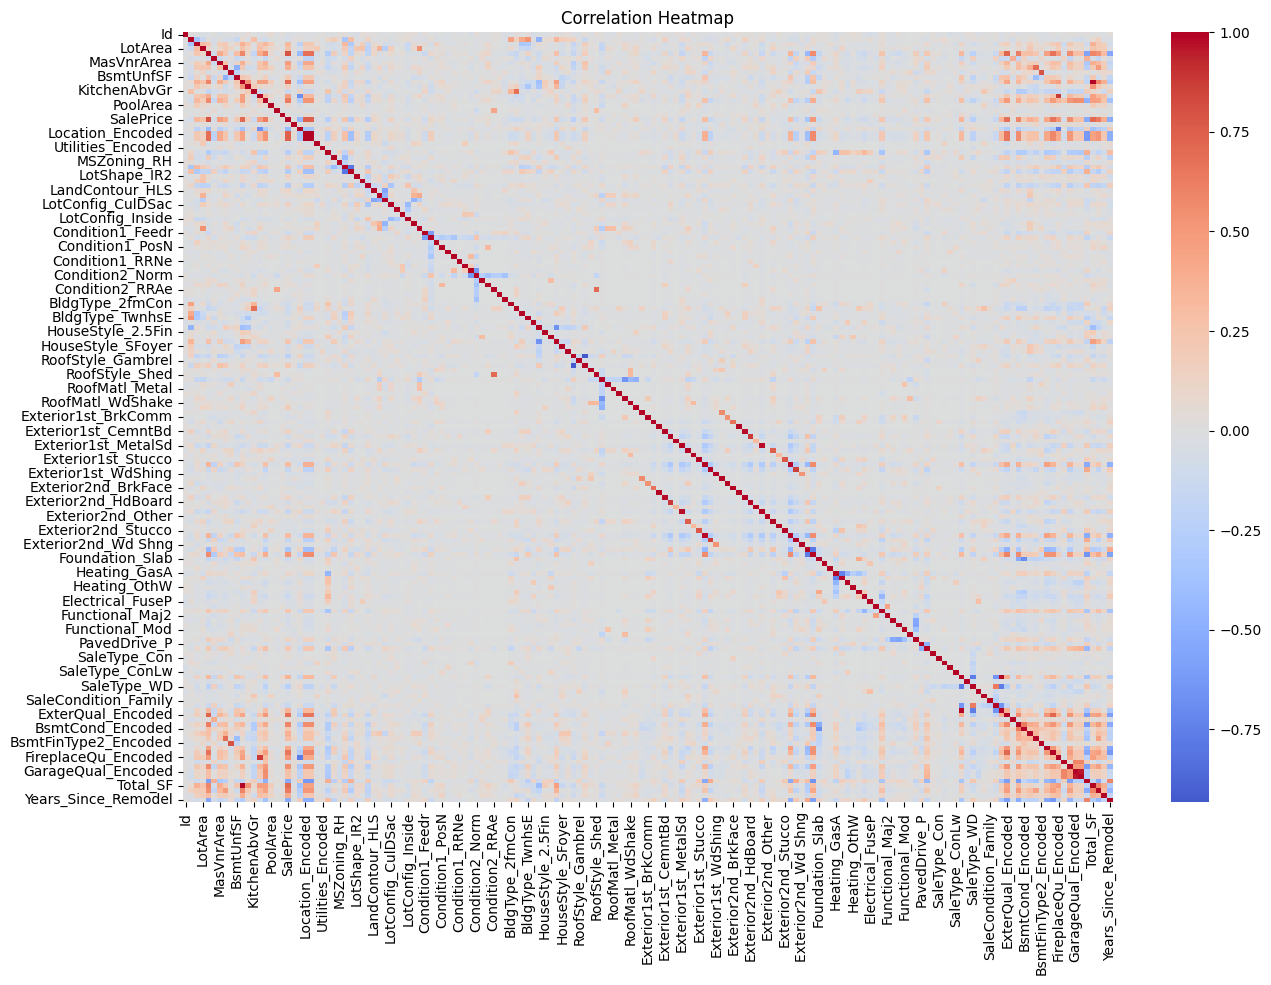

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap for visualization
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


#Find highly correlated features, so one of them can be removed

In [ ]:
# Compute correlations
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Extract high correlations (|r| > 0.8)
high_corr = [(a, b) for a, b in corr_pairs.index if corr_pairs[(a, b)] > 0.8 and a != b]

# Remove duplicates by converting each pair to a frozenset (unordered pair)
unique_corr = list({frozenset((a, b)): (a, b) for a, b in high_corr}.values())

# Show top correlated unique pairs
print("Highly correlated column pairs (|r| > 0.8):")
display(unique_corr[:10])

Highly correlated column pairs (|r| > 0.8):


[('GrLivArea', 'Total_SF'),
 ('Exterior1st_CBlock', 'Exterior2nd_CBlock'),
 ('Location_Encoded', 'Neighborhood_Encoded'),
 ('SaleCondition_Partial', 'SaleType_New'),
 ('Exterior2nd_VinylSd', 'Exterior1st_VinylSd'),
 ('Exterior1st_CemntBd', 'Exterior2nd_CmentBd'),
 ('Exterior2nd_MetalSd', 'Exterior1st_MetalSd'),
 ('GarageCond_Encoded', 'GarageQual_Encoded'),
 ('RoofStyle_Gable', 'RoofStyle_Hip'),
 ('Exterior1st_HdBoard', 'Exterior2nd_HdBoard')]

#Remove one of the above highly correlated column

In [ ]:
columns_to_drop_from_high_corr = [
    'Total_SF',
    'Exterior1st_CBlock',
    'Location_Encoded',
    'SaleType_New',
    'Exterior1st_VinylSd',
    'Exterior1st_CemntBd',
    'Exterior1st_MetalSd',
    'GarageQual_Encoded',
    'RoofStyle_Hip',
    'Exterior1st_HdBoard'
]

df = df.drop(columns=columns_to_drop_from_high_corr, errors='ignore')

print(f"Dropped columns from highly correlated pairs: {columns_to_drop_from_high_corr}")
display(df.head())

Dropped columns from highly correlated pairs: ['Total_SF', 'Exterior1st_CBlock', 'Location_Encoded', 'SaleType_New', 'Exterior1st_VinylSd', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'GarageQual_Encoded', 'RoofStyle_Hip', 'Exterior1st_HdBoard']


Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0   1    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1   2   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2   3    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3   4    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4   5    0.073375     0.641972  0.375148     1.374795    -0.517200   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  HeatingQC_Encoded  \
0    0.514104    0.575425   -0.288653  -0.944591  ...           0.891179   
1   -0.570750    1.171992   -0.288653  -0.641228  ...           0.891179   
2    0.325915    0.092907   -0.288653  -0.301643  ...           0.891179   
3   -0.570750   -0.499274   -0.288653  -0.061670  ...          -0.151386   
4    1.366489    0.463568   -0.288653  -0.174865  ...           0.891179   

   KitchenQual_Encoded  FireplaceQu_Encoded  GarageType_Encoded  \
0             0.735994            -1.026663           -0.332716   
1            -0.771091             0.718814           -0.332716   
2             0.735994             0.718814           -0.332716   
3             0.735994             1.155183            1.286501   
4             0.735994             0.718814           -0.332716   

   GarageFinish_Encoded  GarageCond_Encoded  House_Age  Total_Bathrooms  \
0              0.318475            0.265618  -1.043259         1.642256   
1              0.318475            0.265618  -0.183465         0.368581   
2              0.318475            0.265618  -0.977121         1.642256   
3             -0.801942            0.265618   1.800676        -0.268257   
4              0.318475            0.265618  -0.944052         1.642256   

   Total_Porch_Area  Years_Since_Remodel  
0         -0.768375            -0.869941  
1          0.745011             0.390141  
2         -0.889702            -0.821476  
3          0.802481             0.632464  
4          0.604528            -0.724547  

[5 rows x 153 columns]

#Multicollinearity Check (VIF Analysis)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only the numerical features (excluding the target variable 'SalePrice')
# Also exclude columns that might still be objects or identifiers
features_for_vif = df.drop(columns=['SalePrice', 'Id', 'missing_flag'], errors='ignore')

# Drop any remaining non-numerical columns if they were not dropped earlier
# (e.g., 'Amenities', 'Utilities Included', 'Nearby Schools' if they still exist as objects)
features_for_vif = features_for_vif.select_dtypes(exclude=['object'])


# Ensure there are no infinite values after standardization or other operations
features_for_vif = features_for_vif.replace([float('inf'), float('-inf')], float('nan')).dropna(axis=1)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features_for_vif.columns

# Add 1 to the DataFrame index for use with VIF calculation
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

print("VIF Results:")
display(vif_data.sort_values(by='VIF', ascending=False))

VIF Results:


Feature        VIF
68    RoofMatl_CompShg  50.339971
104       Heating_GasA  35.128589
24         MSZoning_RL  34.997307
0           MSSubClass  30.830133
25         MSZoning_RM  26.265460
..                 ...        ...
103    Foundation_Wood   1.137020
16              MoSold   1.133321
122       SaleType_Con   1.118902
44     Condition1_RRNe   1.106357
92   Exterior2nd_Other   1.097583

[150 rows x 2 columns]

#Found some features are having high VIF values which can be removed. Some are having moderate VIF like >10 but <25. For them, finding out their relationship between Sales price to decide whether to drop them or not

In [ ]:
# Set a VIF threshold (e.g., 10)
vif_threshold = 10

# Get the list of features with high VIF
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['Feature'].tolist()

# Calculate the correlation of these features with 'SalePrice'
correlations_with_saleprice = df[high_vif_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

# Display the correlations (excluding the correlation of SalePrice with itself)
print(f"Correlation with SalePrice for features with VIF > {vif_threshold}:")
display(correlations_with_saleprice.drop('SalePrice'))

Correlation with SalePrice for features with VIF > 10:


Exterior2nd_VinylSd    0.306389
MSZoning_RL            0.245063
RoofMatl_WdShngl       0.169324
Heating_GasA           0.092529
MSZoning_FV            0.089950
RoofMatl_WdShake       0.044643
RoofMatl_Tar&Grv       0.004921
BldgType_TwnhsE        0.003804
Heating_GasW          -0.020103
Exterior2nd_Plywood   -0.052941
Exterior2nd_HdBoard   -0.067864
MSSubClass            -0.084284
RoofMatl_CompShg      -0.104505
Exterior2nd_Wd Sdng   -0.161800
Exterior2nd_MetalSd   -0.162389
MSZoning_RM           -0.288065
Name: SalePrice, dtype: float64

#Drop High VIF value columns(>25) and feature having VIF>10 and  less correlated value with SalesPrice

In [ ]:
columns_to_drop_from_vif = [
    'RoofMatl_Tar&Grv',
    'BldgType_TwnhsE',
    'Heating_GasW',
    'RoofMatl_CompShg',
    'Heating_GasA',
    'MSZoning_RL',
    'MSSubClass',
    'MSZoning_RM'
]

df = df.drop(columns=columns_to_drop_from_vif, errors='ignore')

print(f"Dropped columns based on VIF and correlation with SalePrice: {columns_to_drop_from_vif}")
display(df.head())

Dropped columns based on VIF and correlation with SalePrice: ['RoofMatl_Tar&Grv', 'BldgType_TwnhsE', 'Heating_GasW', 'RoofMatl_CompShg', 'Heating_GasA', 'MSZoning_RL', 'MSSubClass', 'MSZoning_RM']


Id  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1    -0.220875 -0.207142     0.651479    -0.517200    0.514104   
1   2     0.460320 -0.091886    -0.071836     2.179628   -0.570750   
2   3    -0.084636  0.073480     0.651479    -0.517200    0.325915   
3   4    -0.447940 -0.096897     0.651479    -0.517200   -0.570750   
4   5     0.641972  0.375148     1.374795    -0.517200    1.366489   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  GrLivArea  ...  HeatingQC_Encoded  \
0    0.575425   -0.288653  -0.944591   0.370333  ...           0.891179   
1    1.171992   -0.288653  -0.641228  -0.482512  ...           0.891179   
2    0.092907   -0.288653  -0.301643   0.515013  ...           0.891179   
3   -0.499274   -0.288653  -0.061670   0.383659  ...          -0.151386   
4    0.463568   -0.288653  -0.174865   1.299326  ...           0.891179   

   KitchenQual_Encoded  FireplaceQu_Encoded  GarageType_Encoded  \
0             0.735994            -1.026663           -0.332716   
1            -0.771091             0.718814           -0.332716   
2             0.735994             0.718814           -0.332716   
3             0.735994             1.155183            1.286501   
4             0.735994             0.718814           -0.332716   

   GarageFinish_Encoded  GarageCond_Encoded  House_Age  Total_Bathrooms  \
0              0.318475            0.265618  -1.043259         1.642256   
1              0.318475            0.265618  -0.183465         0.368581   
2              0.318475            0.265618  -0.977121         1.642256   
3             -0.801942            0.265618   1.800676        -0.268257   
4              0.318475            0.265618  -0.944052         1.642256   

   Total_Porch_Area  Years_Since_Remodel  
0         -0.768375            -0.869941  
1          0.745011             0.390141  
2         -0.889702            -0.821476  
3          0.802481             0.632464  
4          0.604528            -0.724547  

[5 rows x 145 columns]

#ITERATE VIF ONE MORE TIME

In [ ]:

# Select only the numerical features (excluding the target variable 'SalePrice')
# Also exclude columns that might still be objects or identifiers
features_for_vif = df.drop(columns=['SalePrice', 'Id', 'missing_flag'], errors='ignore')

# Drop any remaining non-numerical columns if they were not dropped earlier
# (e.g., 'Amenities', 'Utilities Included', 'Nearby Schools' if they still exist as objects)
features_for_vif = features_for_vif.select_dtypes(exclude=['object'])


# Ensure there are no infinite values after standardization or other operations
features_for_vif = features_for_vif.replace([float('inf'), float('-inf')], float('nan')).dropna(axis=1)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features_for_vif.columns

# Add 1 to the DataFrame index for use with VIF calculation
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

print("VIF Results:")
display(vif_data.sort_values(by='VIF', ascending=False))

VIF Results:


Feature        VIF
90   Exterior2nd_VinylSd  22.897470
91   Exterior2nd_Wd Sdng  16.497862
83   Exterior2nd_HdBoard  12.637379
85   Exterior2nd_MetalSd  12.604110
87   Exterior2nd_Plywood  11.567733
..                   ...        ...
15                MoSold   1.118025
114         SaleType_Con   1.117739
19     Utilities_Encoded   1.109511
41       Condition1_RRNe   1.104818
86     Exterior2nd_Other   1.096694

[142 rows x 2 columns]

#Find the new hight VIF column list correlation with SalesPrice

In [ ]:
# Set a VIF threshold (e.g., 10)
vif_threshold = 10

# Get the list of features with high VIF
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['Feature'].tolist()

# Calculate the correlation of these features with 'SalePrice'
correlations_with_saleprice = df[high_vif_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

# Display the correlations (excluding the correlation of SalePrice with itself)
print(f"Correlation with SalePrice for features with VIF > {vif_threshold}:")
display(correlations_with_saleprice.drop('SalePrice'))

Correlation with SalePrice for features with VIF > 10:


Exterior2nd_VinylSd    0.306389
Exterior2nd_Plywood   -0.052941
Exterior2nd_HdBoard   -0.067864
Exterior2nd_Wd Sdng   -0.161800
Exterior2nd_MetalSd   -0.162389
Name: SalePrice, dtype: float64

#Removing highest VIF value feature and lowest correlated feature with SalesPrice

In [ ]:
columns_to_drop = ['Exterior2nd_VinylSd', 'Exterior2nd_Plywood']
df = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Dropped columns: {columns_to_drop}")
display(df.head())

Dropped columns: ['Exterior2nd_VinylSd', 'Exterior2nd_Plywood']


Id  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1    -0.220875 -0.207142     0.651479    -0.517200    0.514104   
1   2     0.460320 -0.091886    -0.071836     2.179628   -0.570750   
2   3    -0.084636  0.073480     0.651479    -0.517200    0.325915   
3   4    -0.447940 -0.096897     0.651479    -0.517200   -0.570750   
4   5     0.641972  0.375148     1.374795    -0.517200    1.366489   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  GrLivArea  ...  HeatingQC_Encoded  \
0    0.575425   -0.288653  -0.944591   0.370333  ...           0.891179   
1    1.171992   -0.288653  -0.641228  -0.482512  ...           0.891179   
2    0.092907   -0.288653  -0.301643   0.515013  ...           0.891179   
3   -0.499274   -0.288653  -0.061670   0.383659  ...          -0.151386   
4    0.463568   -0.288653  -0.174865   1.299326  ...           0.891179   

   KitchenQual_Encoded  FireplaceQu_Encoded  GarageType_Encoded  \
0             0.735994            -1.026663           -0.332716   
1            -0.771091             0.718814           -0.332716   
2             0.735994             0.718814           -0.332716   
3             0.735994             1.155183            1.286501   
4             0.735994             0.718814           -0.332716   

   GarageFinish_Encoded  GarageCond_Encoded  House_Age  Total_Bathrooms  \
0              0.318475            0.265618  -1.043259         1.642256   
1              0.318475            0.265618  -0.183465         0.368581   
2              0.318475            0.265618  -0.977121         1.642256   
3             -0.801942            0.265618   1.800676        -0.268257   
4              0.318475            0.265618  -0.944052         1.642256   

   Total_Porch_Area  Years_Since_Remodel  
0         -0.768375            -0.869941  
1          0.745011             0.390141  
2         -0.889702            -0.821476  
3          0.802481             0.632464  
4          0.604528            -0.724547  

[5 rows x 143 columns]

#Using model based Lasso regression  for feature selection from the df

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Separate features (X) and target (y)
# Exclude 'Id' as it's just an identifier
X = df.drop(columns=['SalePrice', 'Id'], errors='ignore')
y = df['SalePrice']

# Split data into training and testing sets (optional but good practice)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression model (you might need to tune the alpha parameter)
lasso = Lasso(alpha=0.1) # alpha is the regularization strength

# Fit the model
lasso.fit(X, y) # Using the full data for feature selection, you can also use training data

# Get the coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)

# Identify features with non-zero coefficients
selected_features_lasso = coefficients[coefficients != 0].index.tolist()

print("Features selected by Lasso Regression (non-zero coefficients):")
display(selected_features_lasso)

# Optional: Display the coefficients of the selected features
# print("\nCoefficients of selected features:")
# display(coefficients[coefficients != 0].sort_values(ascending=False))

Features selected by Lasso Regression (non-zero coefficients):


['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'student_random_feature',
 'missing_flag',
 'Neighborhood_Encoded',
 'Street_Encoded',
 'Utilities_Encoded',
 'CentralAir_Encoded',
 'MSZoning_FV',
 'MSZoning_RH',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle_1.

## Prepare Data for Dimensionality reduction using PCA

Choosing PCA since its a regression model
Select numerical features for PCA and ensure data is ready for PCA.

**Reasoning**:
Select the numerical independent variables from the DataFrame, as PCA is applied to numerical features.

In [ ]:
# Select numerical features for PCA based on Lasso selection
# Ensure 'SalePrice' is not included in X_pca if it was in selected_features_lasso
# Also exclude 'Id' and 'missing_flag' if they were selected by Lasso
cols_for_pca = [col for col in selected_features_lasso if col != 'SalePrice' and col != 'Id' and col != 'missing_flag']

# Select the features for PCA
X_pca = df[cols_for_pca]

# Verify the shape and data types of the PCA input data
print("Shape of data for PCA:", X_pca.shape)
print("\nData types of data for PCA:")
display(X_pca.info())

Shape of data for PCA: (1460, 140)

Data types of data for PCA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 140 entries, LotFrontage to Years_Since_Remodel
dtypes: float64(140)
memory usage: 1.6 MB


None

## Determine the Number of Components for PCA


Calculate and visualize the explained variance ratio to decide the number of principal components to retain.

**Reasoning**:
Apply PCA with all components to calculate the explained variance ratio for each component and visualize the cumulative explained variance to help determine the optimal number of components to retain.

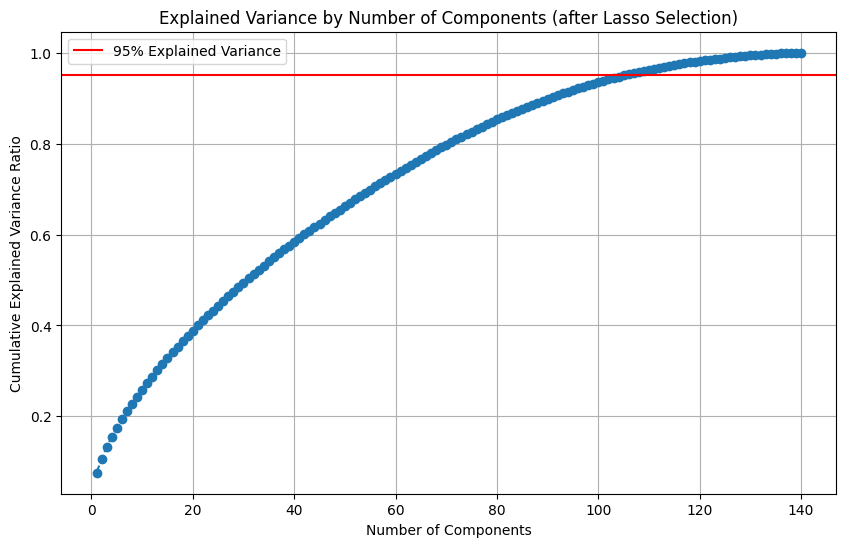


Explained Variance Ratio for each component:


array([0.07589904, 0.02972889, 0.02695301, 0.02198514, 0.02017841,
       0.01898573, 0.01755074, 0.01592083, 0.01575063, 0.01515113,
       0.01481134, 0.01457947, 0.01401   , 0.01331331, 0.01311845,
       0.01291197, 0.01243689, 0.01225036, 0.01163599, 0.01148265,
       0.0112857 , 0.01123443, 0.01086654, 0.0107098 , 0.010681  ,
       0.01052282, 0.01034223, 0.01001321, 0.00998417, 0.00970469,
       0.00954962, 0.00946497, 0.0093363 , 0.00923812, 0.00912175,
       0.00887806, 0.00879237, 0.00870028, 0.00840956, 0.00833783,
       0.00829952, 0.00814791, 0.00808233, 0.00798299, 0.00786824,
       0.00780744, 0.00777334, 0.00764416, 0.00756593, 0.00744212,
       0.00740783, 0.00740332, 0.00732455, 0.00727018, 0.00718162,
       0.00708979, 0.00702826, 0.00701046, 0.00687213, 0.00677941,
       0.00674658, 0.00671318, 0.00660228, 0.00651515, 0.0064015 ,
       0.00635924, 0.00627978, 0.00619399, 0.00615171, 0.00605702,
       0.00595708, 0.00589748, 0.00581041, 0.00558662, 0.00556


Cumulative Explained Variance Ratio:


array([0.07589904, 0.10562793, 0.13258094, 0.15456608, 0.17474448,
       0.19373021, 0.21128095, 0.22720178, 0.24295242, 0.25810354,
       0.27291488, 0.28749435, 0.30150435, 0.31481767, 0.32793611,
       0.34084808, 0.35328497, 0.36553532, 0.37717131, 0.38865396,
       0.39993966, 0.41117409, 0.42204063, 0.43275042, 0.44343142,
       0.45395424, 0.46429648, 0.47430968, 0.48429385, 0.49399854,
       0.50354816, 0.51301313, 0.52234943, 0.53158755, 0.54070929,
       0.54958736, 0.55837973, 0.56708001, 0.57548956, 0.5838274 ,
       0.59212692, 0.60027483, 0.60835716, 0.61634015, 0.62420839,
       0.63201583, 0.63978917, 0.64743333, 0.65499926, 0.66244138,
       0.66984921, 0.67725253, 0.68457708, 0.69184726, 0.69902887,
       0.70611867, 0.71314693, 0.72015739, 0.72702953, 0.73380893,
       0.74055552, 0.7472687 , 0.75387098, 0.76038613, 0.76678763,
       0.77314687, 0.77942666, 0.78562064, 0.79177235, 0.79782938,
       0.80378646, 0.80968394, 0.81549435, 0.82108097, 0.82664

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA with all components
pca = PCA()

# Fit PCA on the prepared data (using features selected by Lasso)
pca.fit(X_pca)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance by number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components (after Lasso Selection)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance') # Example: aim for 95% variance
plt.legend()
plt.show()

# Display the explained variance ratio for each component
print("\nExplained Variance Ratio for each component:")
display(pca.explained_variance_ratio_)

# Display the cumulative explained variance ratio
print("\nCumulative Explained Variance Ratio:")
display(cumulative_explained_variance)

## Apply PCA with Chosen Number of Components

### Selection:
Since after 120-125 feature, the graph looks like flattening. So Decided to select 125 components.

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the chosen number of components
# You need to decide the number of components based on the plot from the previous step
# For demonstration, let's assume you choose a number (e.g., based on 95% variance)
# Replace 'n_components' with your chosen number after examining the plot.
# Based on the previous plot with all features, ~28 components explained 95% variance.
# We need to re-evaluate this after Lasso selection.
print("Please examine the 'Explained Variance by Number of Components (after Lasso Selection)' plot above to choose the number of components.")
# For now, let's use the number of components from the previous run as a placeholder,
# but you should adjust this based on the new plot.
# Assuming you decide on a number of components after viewing the new plot:
# n_components = # your chosen number based on the plot

# *** Replace the line below with your chosen number of components after viewing the plot ***
# For now, using a placeholder. You MUST update this after the previous cell runs.
# For the purpose of running this cell now, let's pick a number slightly less than the number of features selected by Lasso
n_components = min(125, X_pca.shape[1]) # Placeholder: Choose a reasonable number, adjust based on the plot


pca = PCA(n_components=n_components)

# Fit PCA on the prepared data and transform it
X_pca_transformed = pca.fit_transform(X_pca)

# Create a new DataFrame with the principal components
pca_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca_transformed, columns=pca_cols)

# Display the first few rows of the new PCA DataFrame
print(f"Shape of transformed data after PCA with {n_components} components:", df_pca.shape)
display(df_pca.head())

Please examine the 'Explained Variance by Number of Components (after Lasso Selection)' plot above to choose the number of components.
Shape of transformed data after PCA with 125 components: (1460, 125)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.363106 -1.476586 -0.613787 -0.180519  1.387484  0.492013 -1.722296   
1  0.113540  1.803386 -1.428838 -0.088954  1.412148 -1.889921  0.212981   
2  3.244341 -0.585327  0.063656 -0.412512  0.896111  0.650572 -1.483111   
3  0.189831  0.221169  0.914859 -2.274449 -0.335303  0.690490 -0.141092   
4  5.017967  0.314159  1.127271 -0.473346  1.584605  0.642623 -1.739056   

        PC8       PC9      PC10  ...     PC116     PC117     PC118     PC119  \
0  0.631078 -0.028030  0.146213  ... -0.183446 -0.339217 -0.081136  0.116099   
1 -0.164073  1.196247 -0.959758  ...  0.161495  0.522605  0.389045 -0.577493   
2  0.561787  0.001993 -0.198339  ... -0.432014 -0.707863 -0.257768  0.162247   
3 -0.201525 -0.478620  0.850937  ... -0.755569  0.752331 -0.065057 -0.838869   
4  0.287477 -0.431805 -0.633278  ... -0.198552  0.383128 -0.310971  0.103707   

      PC120     PC121     PC122     PC123     PC124     PC125  
0  0.196083 -0.360890  0.246380  0.047250  0.071486 -0.282124  
1  0.165690  0.042814  0.375239  0.154985  0.044075 -0.227424  
2  0.053684 -0.300414  0.321564 -0.054352 -0.111850 -0.221696  
3 -1.113462  1.155457 -0.186050  0.122541 -0.497672 -0.766339  
4 -0.114503 -0.107489  0.397517 -0.109376 -0.180409 -0.010320  

[5 rows x 125 columns]

#Questions to be answered

#After dimensionality reduction, did your random feature load significantly on any principal component?

In [ ]:
if 'student_random_feature' in selected_features_lasso:
    print("Yes, 'student_random_feature' is in the features selected by Lasso Regression.")
else:
    print("No, 'student_random_feature' is not in the features selected by Lasso Regression.")

Yes, 'student_random_feature' is in the features selected by Lasso Regression.


#Yes the feature is listed in Laso regression selected featuire list

In [ ]:
import pandas as pd

# Get the loadings (components) from the fitted PCA model
pca_loadings = pd.DataFrame(pca.components_, columns=X_pca.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Find the loadings for 'student_random_feature' across all principal components
student_random_feature_loadings = pca_loadings['student_random_feature']

print("Loadings of 'student_random_feature' on each principal component:")
display(student_random_feature_loadings.sort_values(key=abs, ascending=False))

# You can define a threshold for "significant" loading.
# A common way is to look for loadings that are substantially larger than others.
# For instance, you could look at the absolute values and see if any stand out.
# As a simple check, let's see the maximum absolute loading.
max_abs_loading = student_random_feature_loadings.abs().max()
print(f"\nMaximum absolute loading for 'student_random_feature': {max_abs_loading:.4f}")

# You can also compare this maximum loading to the maximum loadings of other features
# on the principal components to get a sense of its relative importance in the components.
# For example, print the overall maximum absolute loading across all features and components
overall_max_abs_loading = pca_loadings.abs().max().max()
print(f"Overall maximum absolute loading across all features and components: {overall_max_abs_loading:.4f}")

Loadings of 'student_random_feature' on each principal component:


PC43     0.278040
PC73     0.275431
PC48    -0.249858
PC72    -0.228078
PC79     0.222666
           ...   
PC109    0.003264
PC111    0.002780
PC105   -0.002220
PC41     0.001822
PC42     0.000803
Name: student_random_feature, Length: 125, dtype: float64


Maximum absolute loading for 'student_random_feature': 0.2780
Overall maximum absolute loading across all features and components: 0.5008


#Which 3 features appear most correlated with your random feature? Why do you think this occurs?

Type of object before sorting: <class 'pandas.core.frame.DataFrame'>
Shape of object before sorting: (142, 2)
Correlation of 'student_random_feature' with other Lasso-selected features:


BsmtFinType1_Encoded    0.110519
BsmtFinSF1              0.074273
Exterior2nd_AsphShn     0.058128
GarageCond_Encoded      0.057247
Condition2_PosN         0.056442
                          ...   
Condition1_PosA        -0.047884
Exterior1st_Stucco     -0.048411
Exterior1st_WdShing    -0.051996
HouseStyle_2Story      -0.054289
Exterior2nd_Stucco     -0.054333
Name: student_random_feature, Length: 140, dtype: float64

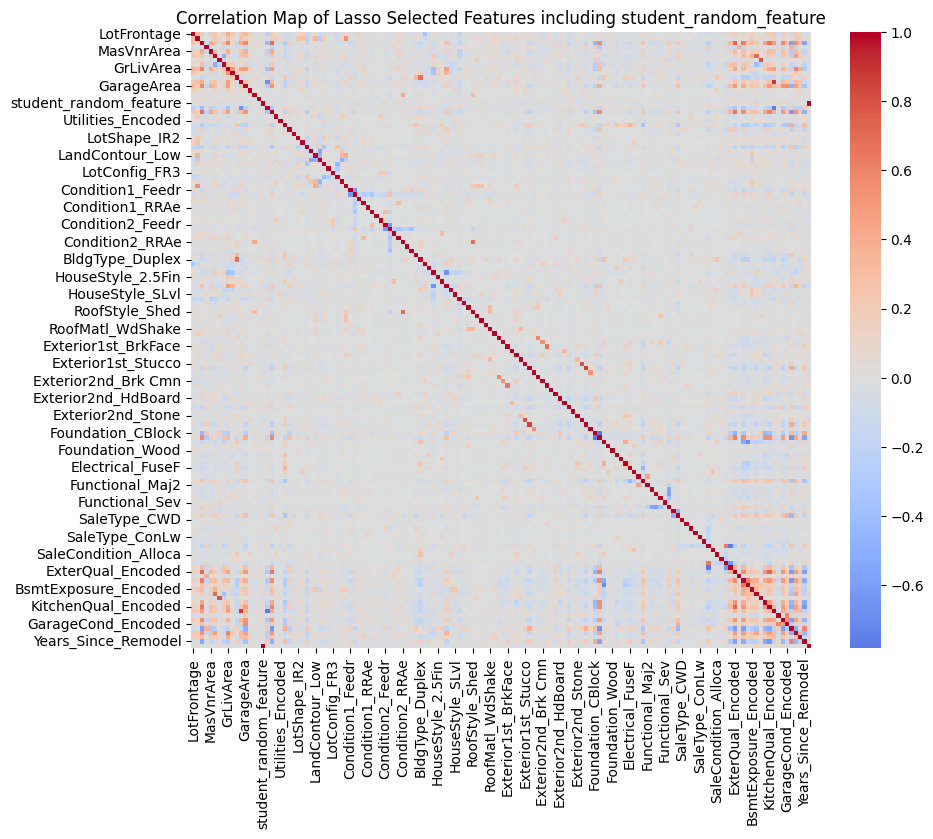

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of the DataFrame with 'student_random_feature' and other Lasso-selected features
# Ensure 'SalePrice' and 'Id' are excluded if they were in selected_features_lasso
cols_for_corr_map = [col for col in selected_features_lasso if col != 'SalePrice' and col != 'Id']
if 'student_random_feature' in df.columns:
    cols_for_corr_map.append('student_random_feature')
else:
    print("'student_random_feature' not found in DataFrame.")

# Select the subset of the DataFrame
df_subset_corr = df[cols_for_corr_map]

# Calculate the correlation matrix for the subset
correlation_matrix_subset = df_subset_corr.corr()

# Get the correlations of 'student_random_feature' with other features
# Explicitly select the column to ensure it's a Series
student_random_corr_series = correlation_matrix_subset['student_random_feature']

# Debugging: Print the type and shape of the object before sorting
print(f"Type of object before sorting: {type(student_random_corr_series)}")
print(f"Shape of object before sorting: {student_random_corr_series.shape}")

# The error was here: sort_values() on a Series does not need 'by'
# Ensure it's treated as a Series and sort
# If student_random_corr_series is unexpectedly 2D, we need to select the column correctly
if student_random_corr_series.ndim > 1:
    # Assuming the column we want is the first one if it's 2D
    student_random_corr_series = student_random_corr_series.iloc[:, 0]

student_random_corr_with_others = student_random_corr_series.sort_values(ascending=False)


# Display the correlations (excluding the correlation of student_random_feature with itself)
print("Correlation of 'student_random_feature' with other Lasso-selected features:")
display(student_random_corr_with_others.drop('student_random_feature'))

# Optional: Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Map of Lasso Selected Features including student_random_feature")
plt.show()

#Based in final lasso selected feature, below feature got high correlation with student_random_feature
BsmtFinType1_Encoded	0.110519
BsmtFinSF1	0.074273
Exterior2nd_AsphShn	0.058128

## Summary Report: Data Processing and Feature Engineering Pipeline

This report summarizes the key steps taken and the reasoning behind the decisions made in preparing the dataset for a house price prediction task.

### 1. Data Extraction and Initial Inspection
- **Action:** Loaded the data from "/tmp/house_prices_data/train.csv" into a pandas DataFrame (`df`).
- **Reasoning:** The first step in any data science project is to load the data into a suitable structure for analysis and manipulation. Initial inspection (`df.head()`, `df.info()`, `df.shape`) provides an overview of the data, including column names, data types, and the number of rows and columns.

### 2. Handling of Missing Values
- **Action:** Identified columns with missing values and their percentages (`df.isnull().sum()`, heatmap).
- **Reasoning:** Understanding the extent and pattern of missing data is crucial as missing values can negatively impact model performance. Visualizing with a heatmap helps to see the distribution of missingness.
- **Action:** Dropped columns with more than 50% missing values ('Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature').
- **Reasoning:** Columns with a very high percentage of missing data are often not informative and can introduce noise or bias if not handled appropriately. Dropping them is a common strategy in such cases.
- **Action:** Assessed the relationship of some columns with remaining missing values ('FireplaceQu', 'LotFrontage') with the target variable 'SalePrice' using a box plot and correlation.
- **Reasoning:** Before imputing or dropping columns with a moderate amount of missing data, it's important to understand if they have a meaningful relationship with the target variable. This helps in deciding whether to retain and impute them.
- **Action:** Imputed missing values in 'FireplaceQu' with a new category 'Missing'.
- **Reasoning:** For a categorical feature like 'FireplaceQu', where missingness likely indicates the absence of the feature, creating a separate 'Missing' category preserves this information and allows the model to learn its potential impact.
- **Action:** Imputed missing values in numerical columns ('LotFrontage', 'MasVnrArea') with the median.
- **Reasoning:** Median imputation is a simple yet robust method for numerical data, especially when the data might be skewed or contain outliers, as the median is less sensitive to extreme values than the mean.
- **Action:** Imputed missing values in remaining categorical columns (basement and garage-related, 'Electrical') with 'None' or the mode.
- **Reasoning:** For categorical features where missingness implies absence, filling with 'None' is appropriate. For other categorical features like 'Electrical', mode imputation is a standard approach to fill missing values with the most frequent category.

### 3. Feature Engineering Steps
- **Action:** Created new features by combining or transforming existing ones: 'House_Age', 'Total_SF', 'Total_Bathrooms', 'Total_Porch_Area', 'Years_Since_Remodel'.
- **Reasoning:** Combining related features can create more informative predictors. For example, total area or total bathrooms might be more predictive than individual component areas or bathroom counts. Age and years since remodel are often significant factors in house prices.
- **Action:** Created binary indicator features ('Has_Bsmt', 'Has_Garage', 'Has_Fireplace').
- **Reasoning:** These features explicitly indicate the presence or absence of key house features, which can be strong predictors of price.

### 4. Categorical Feature Encoding
- **Action:** Applied Target Encoding to 'Neighborhood'.
- **Reasoning:** Target encoding is suitable for high-cardinality categorical features like 'Neighborhood', reducing the number of new columns compared to one-hot encoding while capturing the relationship with the target variable.
- **Action:** Applied Binary Encoding to binary categorical variables ('Street', 'Utilities', 'CentralAir').
- **Reasoning:** Binary encoding efficiently converts features with two categories into a numerical format (0 and 1).
- **Action:** Applied One-Hot Encoding to nominal categorical variables with a moderate number of unique values ('MSZoning', 'LotShape', 'LandContour', etc.).
- **Reasoning:** One-hot encoding is standard for nominal categories, creating binary columns that prevent the model from assuming an ordered relationship.
- **Action:** Applied Ordinal Encoding to categorical variables with an inherent order ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', etc.).
- **Reasoning:** Ordinal encoding assigns numerical ranks based on the defined order of categories, preserving the ordinal information which can be beneficial for some models.
- **Action:** Dropped the original categorical columns after creating their encoded numerical representations.
- **Reasoning:** Once categorical features are encoded into numerical form, the original object-type columns are no longer needed and can be dropped to reduce memory usage and prevent issues with models that require numerical input.

### 5. Feature Selection based on Correlation and VIF
- **Action:** Identified highly correlated numerical features using a correlation matrix and heatmap.
- **Reasoning:** High correlation between predictor variables (multicollinearity) can affect the stability and interpretability of some models.
- **Action:** Dropped one column from each pair of highly correlated features.
- **Reasoning:** This is a common strategy to reduce pairwise multicollinearity.
- **Action:** Calculated Variance Inflation Factors (VIF) to check for multicollinearity among multiple features.
- **Reasoning:** VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity. High VIF values indicate problematic collinearity.
- **Action:** Examined the correlation of high-VIF features with 'SalePrice'.
- **Reasoning:** This helps in deciding which feature to remove from a collinear group – often, the one with lower correlation to the target or higher VIF is considered for removal.
- **Action:** Iteratively dropped columns with high VIF and/or low correlation to 'SalePrice' among collinear features.
- **Reasoning:** This iterative process aims to reduce multicollinearity until VIFs are below a desired threshold, improving model stability.

### 6. Model-Based Feature Selection (Lasso)
- **Action:** Applied Lasso Regression to select features with non-zero coefficients.
- **Reasoning:** Lasso's L1 regularization can shrink the coefficients of less important features to zero, automatically performing feature selection.

### 7. Dimensionality Reduction using PCA
- **Action:** Prepared data for PCA using features selected by Lasso.
- **Reasoning:** Applying PCA to a reduced set of features (like those selected by Lasso) can help focus dimensionality reduction on the most relevant information.
- **Action:** Determined the number of components for PCA by analyzing the cumulative explained variance ratio plot.
- **Reasoning:** This helps decide how many principal components to retain to capture a desired percentage of the data's variance.
- **Action:** Applied PCA with the chosen number of components to transform the data.
- **Reasoning:** PCA reduces the dimensionality of the feature space while retaining most of the variance, potentially mitigating multicollinearity and improving model efficiency.

### 8. Addressing Specific Questions
- **Action:** Checked if 'student_random_feature' was selected by Lasso and its loadings on principal components.
- **Reasoning:** To understand the impact and representation of the random feature in the feature selection and dimensionality reduction steps.
- **Action:** Calculated and displayed the correlation of 'student_random_feature' with other Lasso-selected features.
- **Reasoning:** To identify any unexpected correlations between the random feature and actual dataset features.

### 9. Finish task
The dataset has been processed, missing values handled, features engineered and encoded, and dimensionality reduced, resulting in a dataset ready for training a machine learning model to predict house prices.

Visualize numerical features using box plots to identify potential outliers.